In [76]:
# !pip install pandas
# !pip install nltk
# !pip install matplotlib

### The first step is to import the necessary libraries:

In [83]:
import pandas as pd
# plots
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

### reading data

In [84]:
df = pd.read_csv("./CleanedreutersData.csv")
df.head(1)

,Topics,Menus,Title,Authors,Date,Images,Text
0,Africa,/world/africa/,Survivors in shock as Cyclone Freddy toll pass...,Tom Gibb,2023-03-16 13:44:00+00:00,https://cloudfront-us-east-2.images.arcpublish...,"BLANTYRE, March 16 (Reuters) - The last thing ..."


### Preprocessing

A function called preprocess_text is defined to preprocess the text data. This function removes punctuation, tokenizes the text, removes stopwords, and lemmatizes the remaining words:

In [86]:

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Load stopwords
stop_words = set(stopwords.words('english'))
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lowercase the remaining words
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

### Word frequency distribution

A loop is then run through each group in the data, where all the article titles are concatenated into a single string, which is then preprocessed using the preprocess_text function. The preprocessed text is then tokenized, and a frequency distribution is created using the FreqDist function from NLTK. Finally, the top 10 most common words for each topic are printed and plotted using Matplotlib:

Topic: ADAS, AV & Safety
[('volkswagen', 1), ('share', 1), ('result', 1), ('mock', 1), ('listing', 1), ('exercise', 1), ('june', 1)]


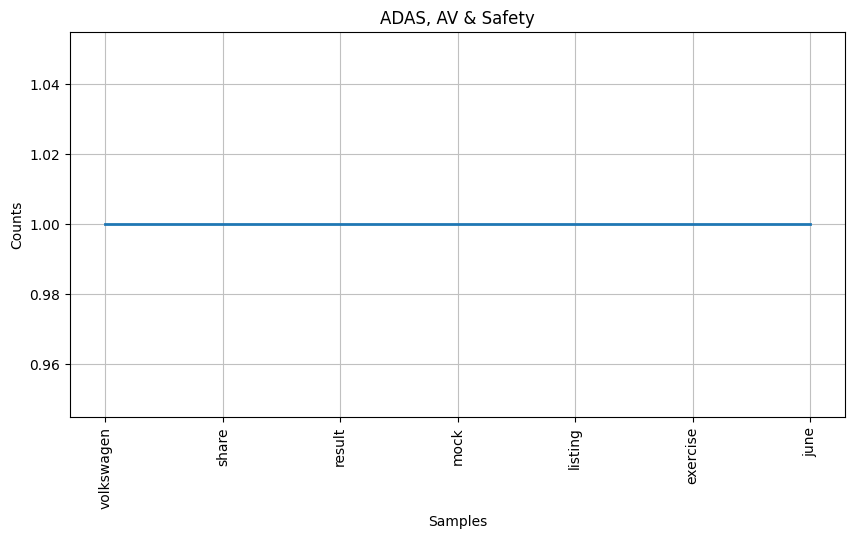

Topic: Aerospace & Defense
[('jet', 4), ('boeing', 4), ('bransons', 2), ('virgin', 2), ('orbit', 2), ('explores', 2), ('option', 2), ('cash', 2), ('woe', 2), ('force', 2)]


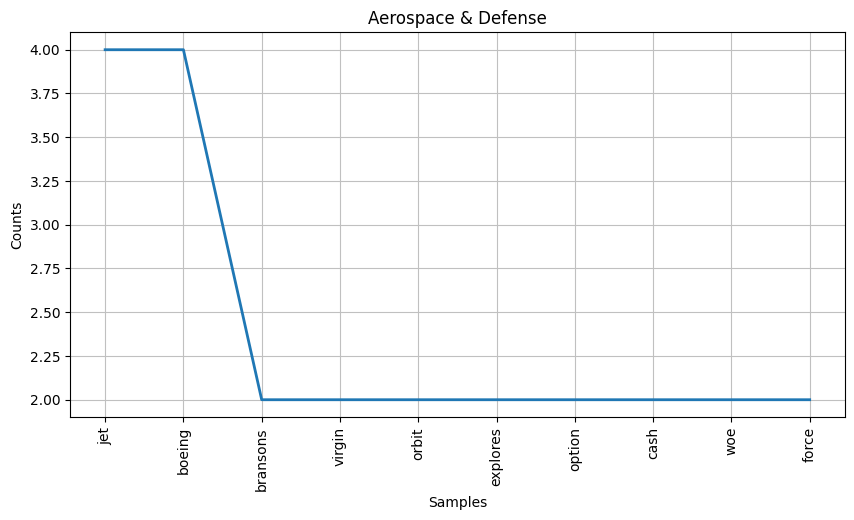

Topic: Africa
[('say', 4), ('south', 4), ('african', 4), ('malawi', 3), ('cyclone', 2), ('freddy', 2), ('toll', 2), ('mozambique', 2), ('u', 2), ('west', 2)]


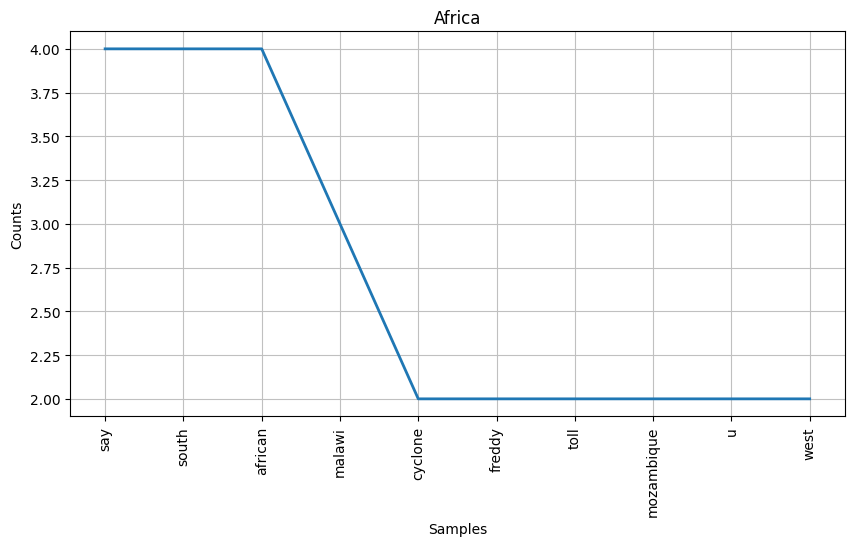

Topic: Americas
[('brazil', 5), ('u', 4), ('president', 3), ('say', 3), ('death', 2), ('colombia', 2), ('mexico', 2), ('appeal', 2), ('mexican', 2), ('probe', 2)]


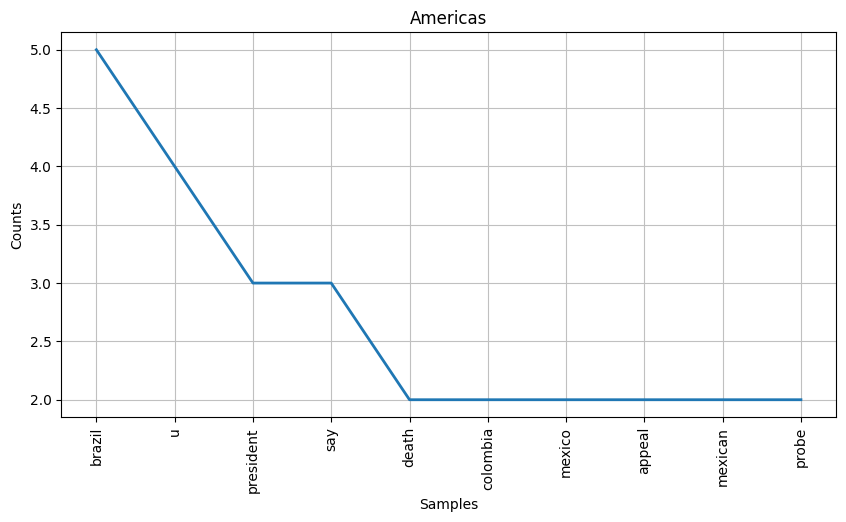

Topic: Asia Pacific
[('korea', 6), ('south', 6), ('japan', 4), ('pm', 3), ('say', 3), ('north', 2), ('pakistan', 2), ('police', 2), ('khan', 2), ('korean', 2)]


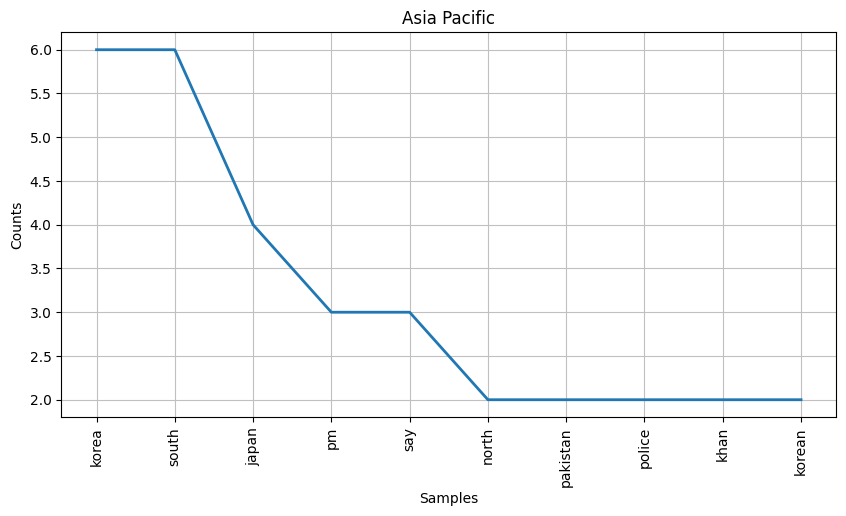

Topic: Asian Markets
[('market', 2), ('china', 1), ('renews', 1), ('pledge', 1), ('wider', 1), ('access', 1), ('foreign', 1), ('investor', 1), ('japan', 1), ('export', 1)]


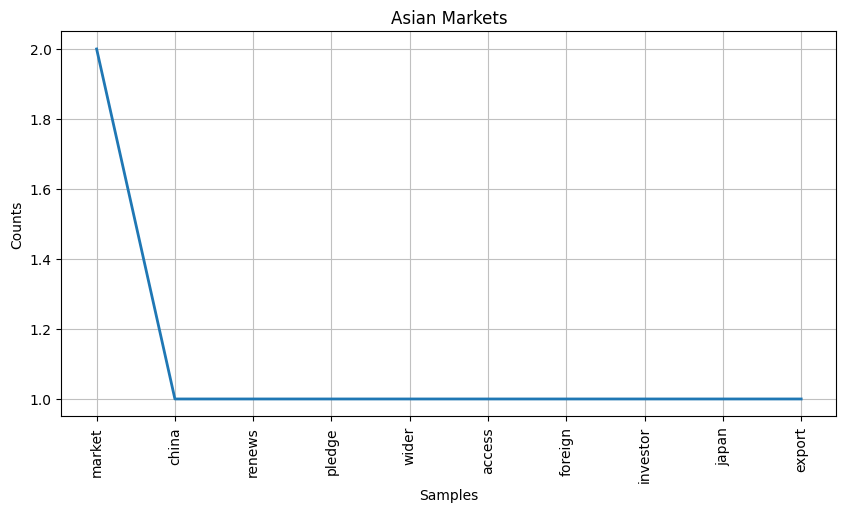

Topic: Autos & Transportation
[('battery', 3), ('ev', 2), ('exclusive', 2), ('tesla', 2), ('russia', 2), ('take', 2), ('electric', 2), ('volkswagen', 1), ('invests', 1), ('raw', 1)]


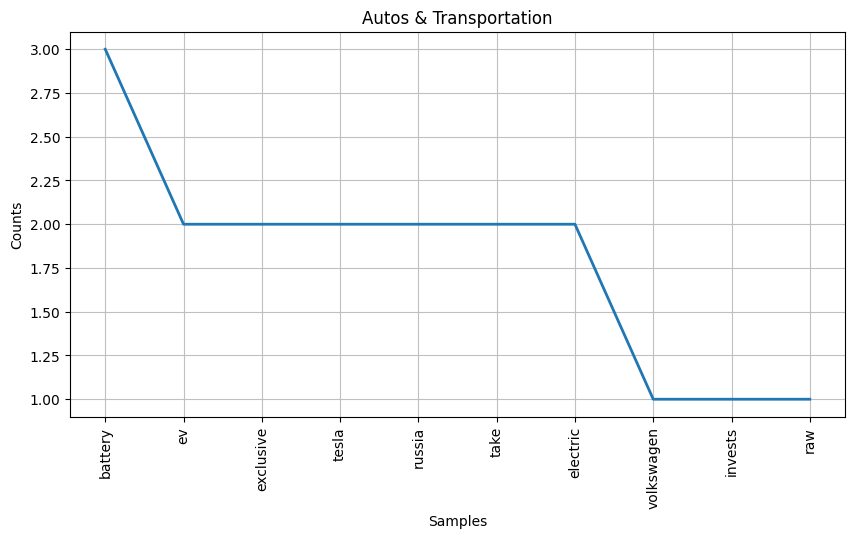

Topic: Business
[('bank', 33), ('svb', 27), ('u', 20), ('say', 16), ('credit', 16), ('suisse', 15), ('collapse', 9), ('fund', 9), ('uk', 8), ('financial', 8)]


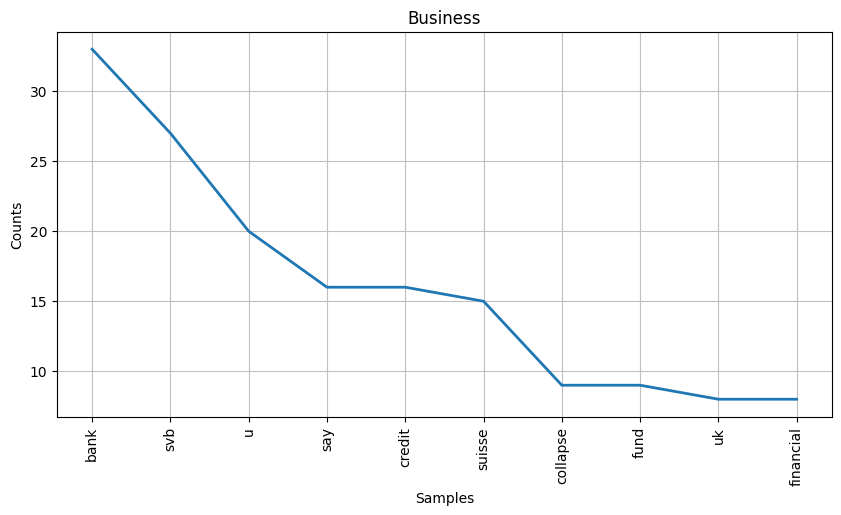

Topic: COVID-19
[('moderna', 1), ('hire', 1), ('around', 1), ('2000', 1), ('employee', 1), ('amid', 1), ('mrna', 1), ('development', 1), ('push', 1)]


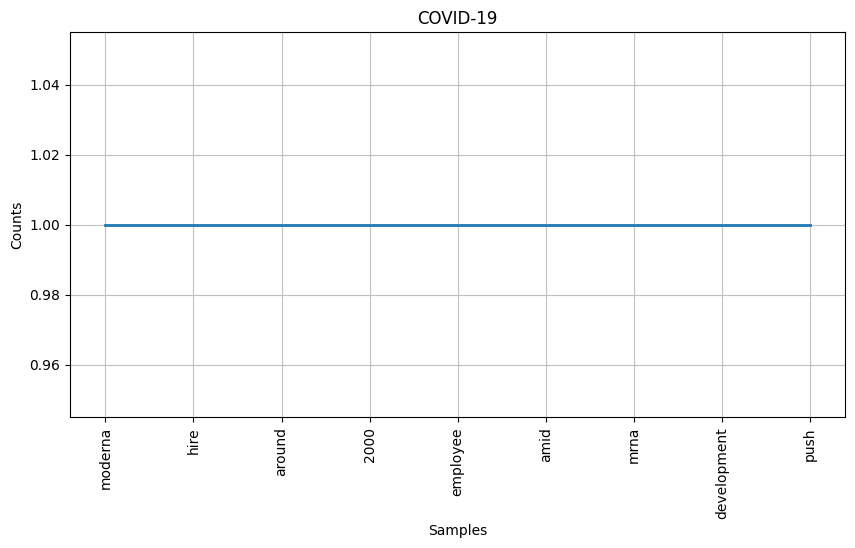

Topic: Carbon Markets
[('bid', 1), ('500', 1), ('mln', 1), ('u', 1), ('climate', 1), ('grant', 1), ('direct', 1), ('air', 1), ('carbon', 1), ('capture', 1)]


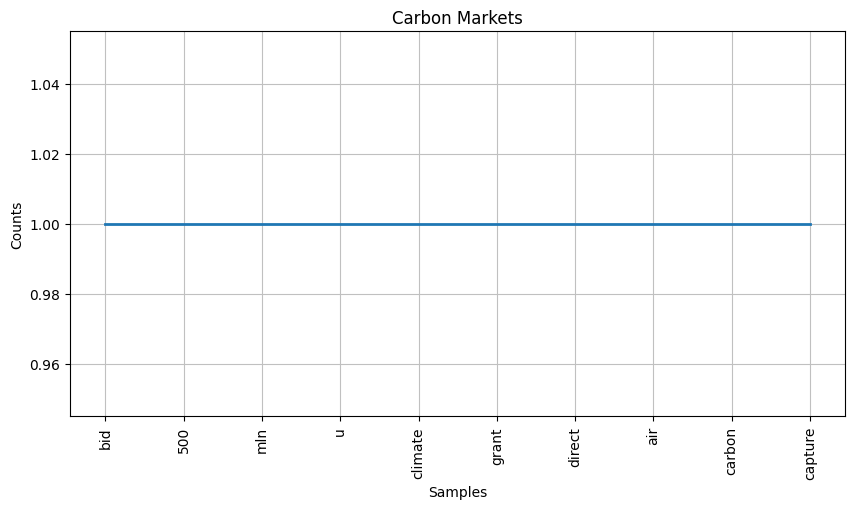

Topic: Charged
[('ev', 6), ('battery', 6), ('plant', 4), ('plan', 3), ('electric', 3), ('car', 3), ('volkswagen', 3), ('push', 2), ('startup', 2), ('see', 2)]


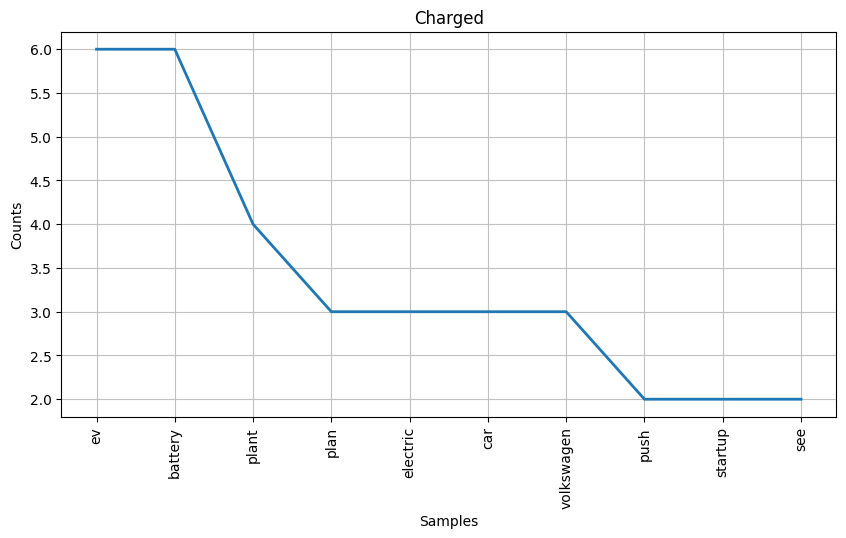

Topic: China
[('china', 6), ('create', 1), ('powerful', 1), ('financial', 1), ('watchdog', 1), ('run', 1), ('communist', 1), ('party', 1), ('exclusive', 1), ('increasingly', 1)]


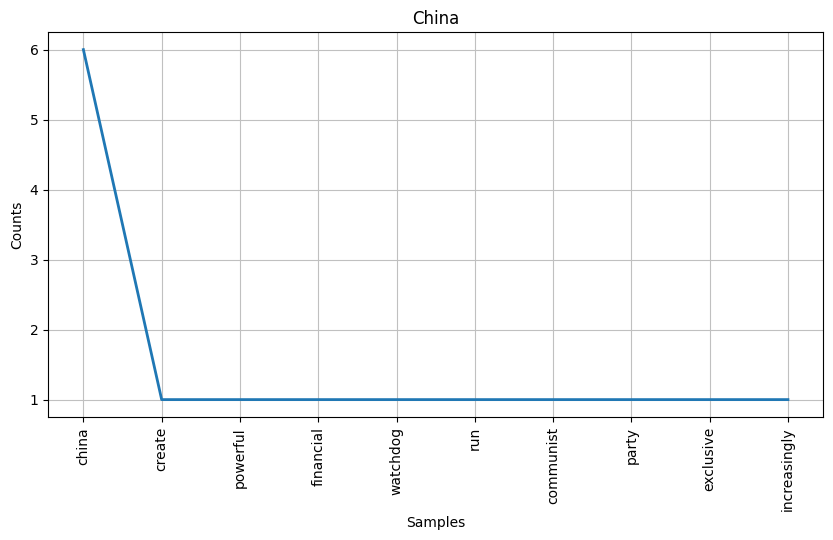

Topic: Clean Energy
[('energy', 2), ('climate', 2), ('goal', 2), ('crisis', 1), ('seen', 1), ('posing', 1), ('existential', 1), ('threat', 1), ('reducing', 1), ('waste', 1)]


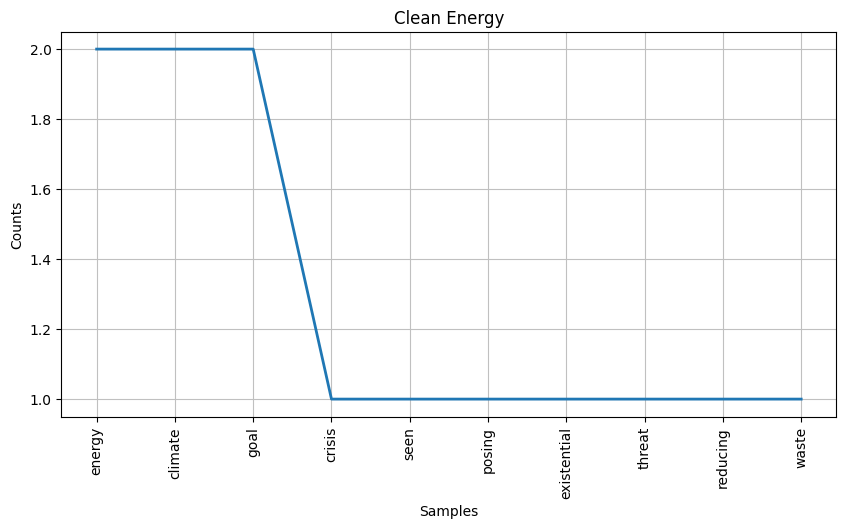

Topic: Climate Change
[('billionaire', 1), ('ibrahim', 1), ('decries', 1), ('double', 1), ('standard', 1), ('west', 1), ('seeking', 1), ('gas', 1), ('africa', 1), ('uk', 1)]


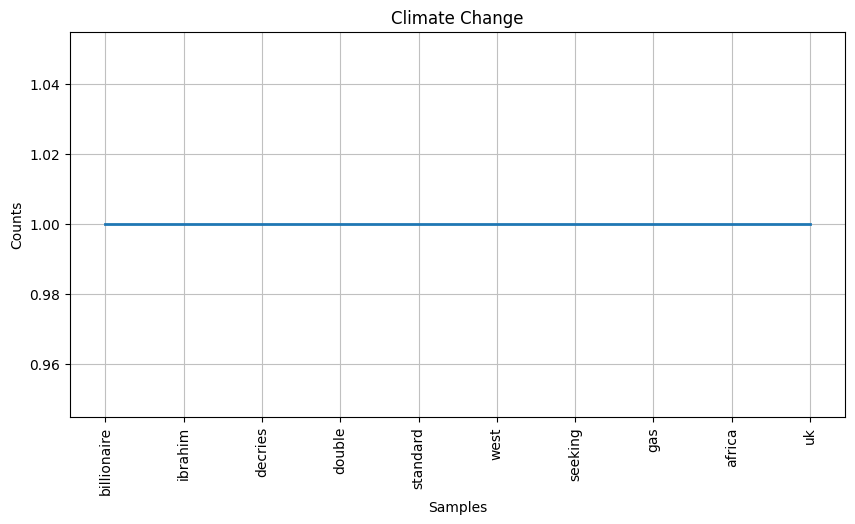

Topic: Commodities
[('talk', 2), ('gold', 1), ('steady', 1), ('6wk', 1), ('peak', 1), ('credit', 1), ('suisse', 1), ('lifeline', 1), ('lift', 1), ('sentiment', 1)]


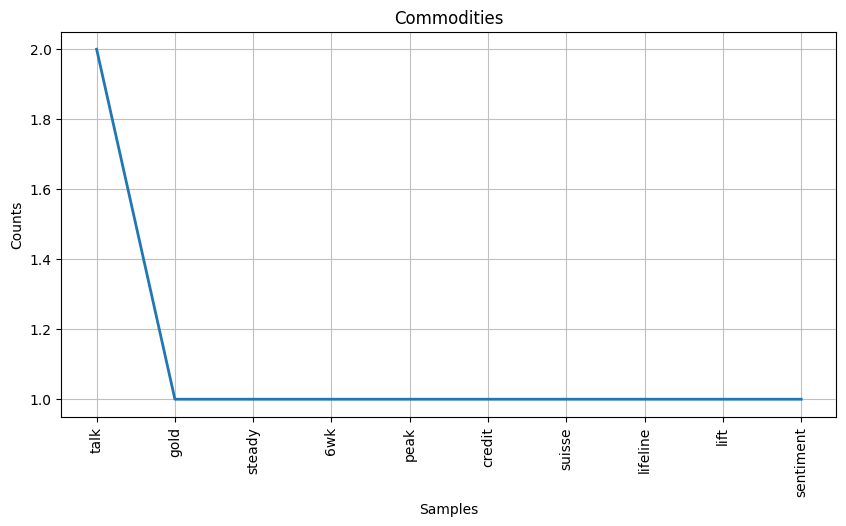

Topic: Currencies
[('rupee', 5), ('india', 3), ('banking', 2), ('dollar', 2), ('svb', 2), ('high', 2), ('crisis', 2), ('euro', 1), ('give', 1), ('back', 1)]


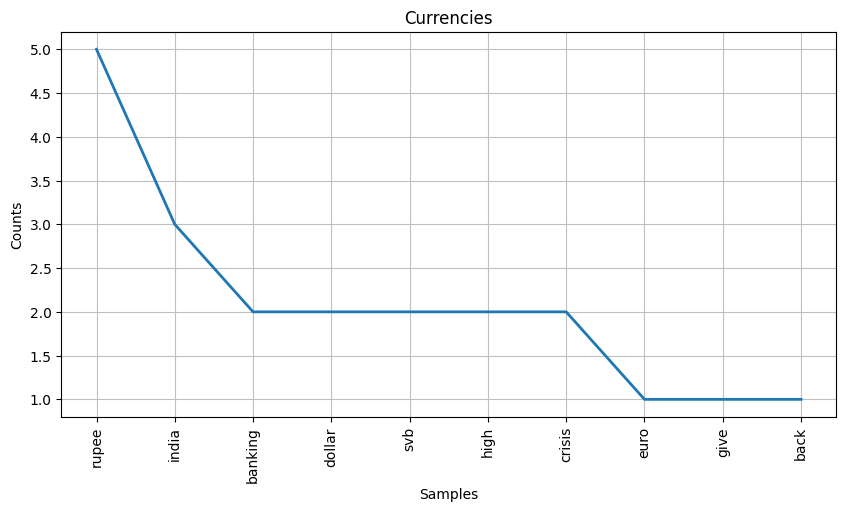

Topic: Deals
[('bln', 5), ('deal', 4), ('mln', 2), ('source', 2), ('pfizer', 1), ('look', 1), ('past', 1), ('covid', 1), ('43', 1), ('cancer', 1)]


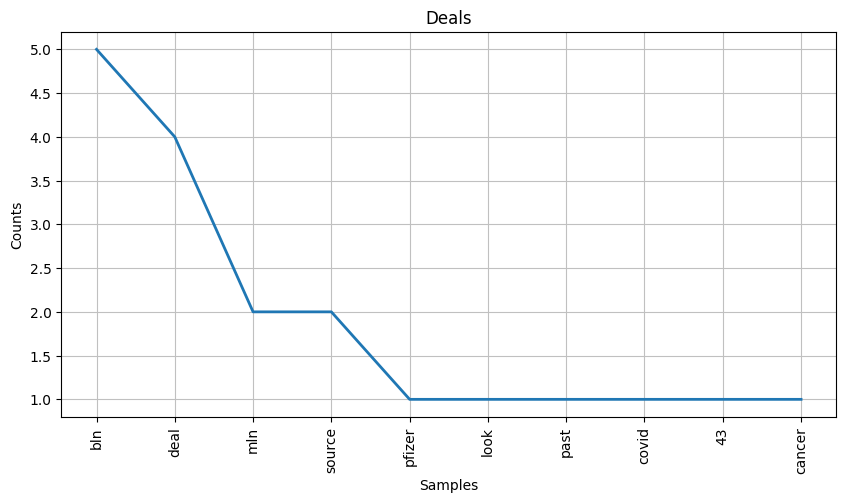

Topic: Disrupted
[('ai', 5), ('gpt4', 3), ('openai', 3), ('race', 3), ('chatgpt', 3), ('uk', 2), ('launch', 2), ('nuclear', 2), ('microsoftbacked', 2), ('openais', 2)]


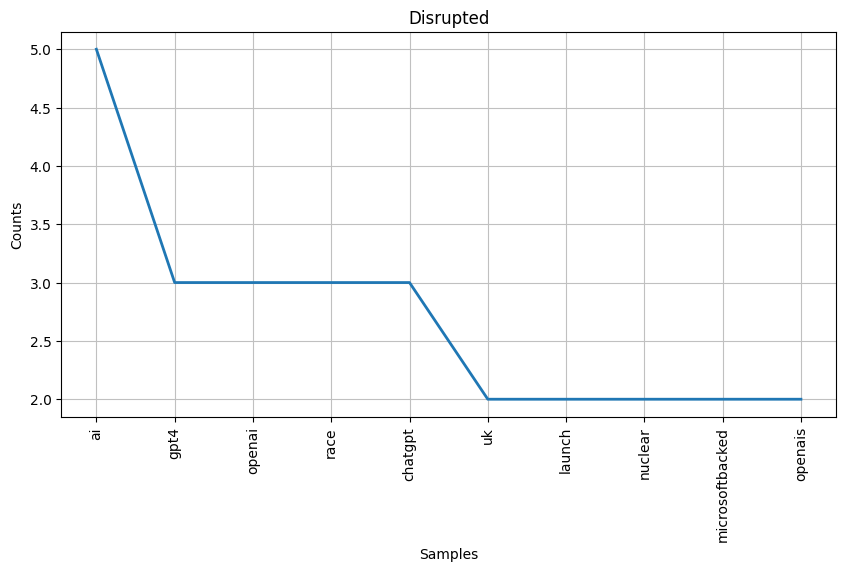

Topic: ESG Investors
[('credit', 1), ('suisse', 1), ('set', 1), ('2030', 1), ('target', 1), ('emission', 1), ('tied', 1), ('loan', 1), ('wage', 1), ('go', 1)]


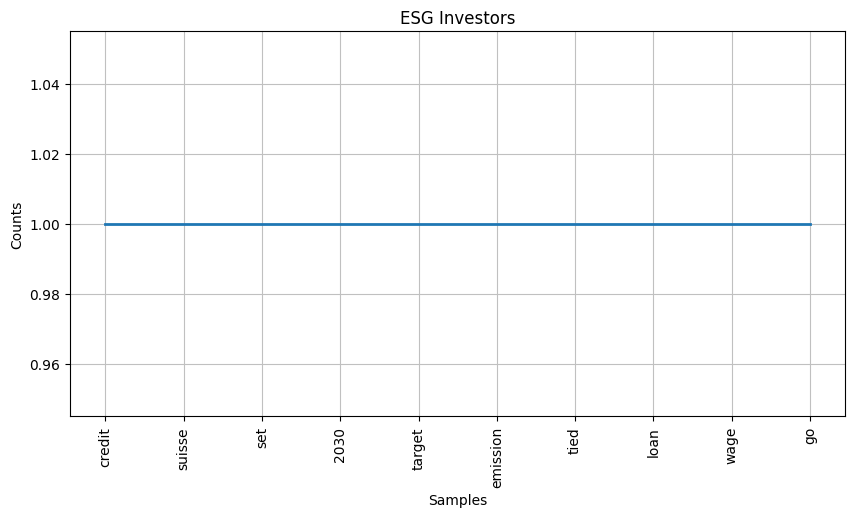

Topic: Employee Benefits & Executive Compensation
[('calpers', 1), ('ceo', 1), ('frost', 1), ('hope', 1), ('cop26', 1), ('yield', 1), ('greeninvesting', 1), ('data', 1), ('caterpillar', 1), ('union', 1)]


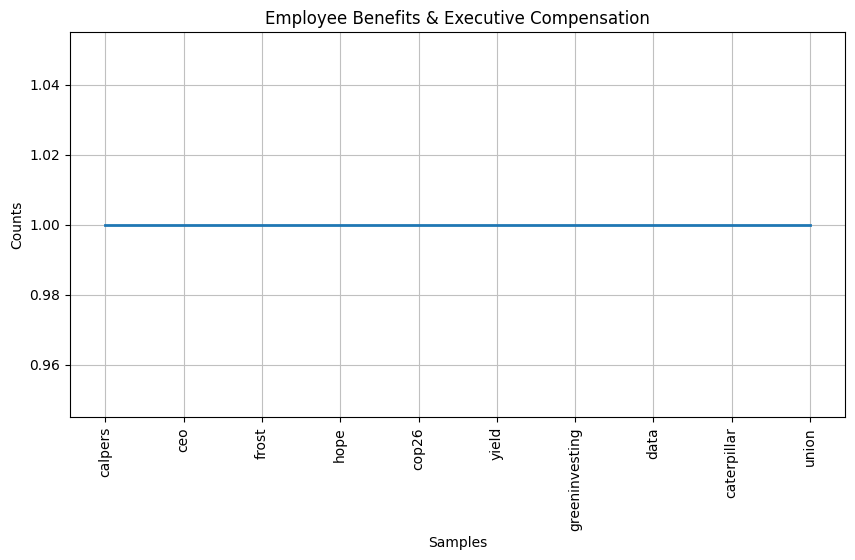

Topic: Energy
[('india', 1), ('greenko', 1), ('cofounder', 1), ('keen', 1), ('return', 1), ('london', 1), ('market', 1)]


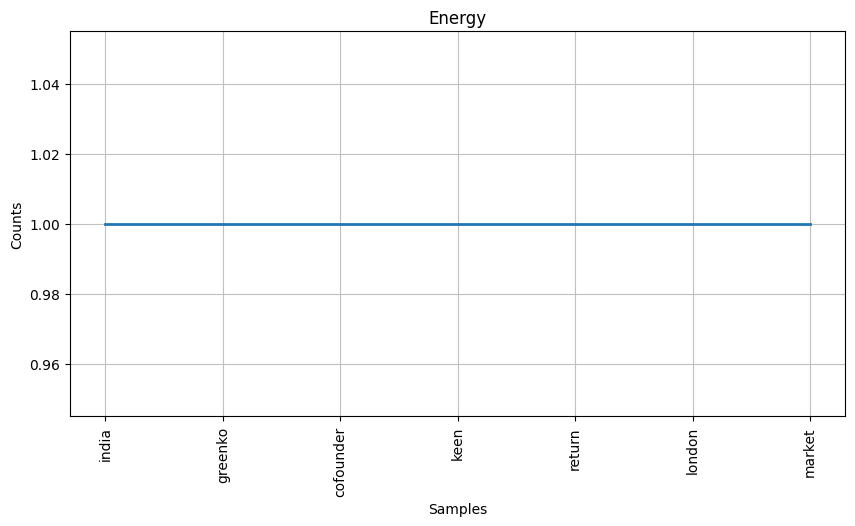

Topic: Environment
[('eu', 3), ('say', 3), ('cyclone', 2), ('among', 2), ('least', 2), ('water', 2), ('green', 2), ('policy', 2), ('energy', 2), ('austria', 1)]


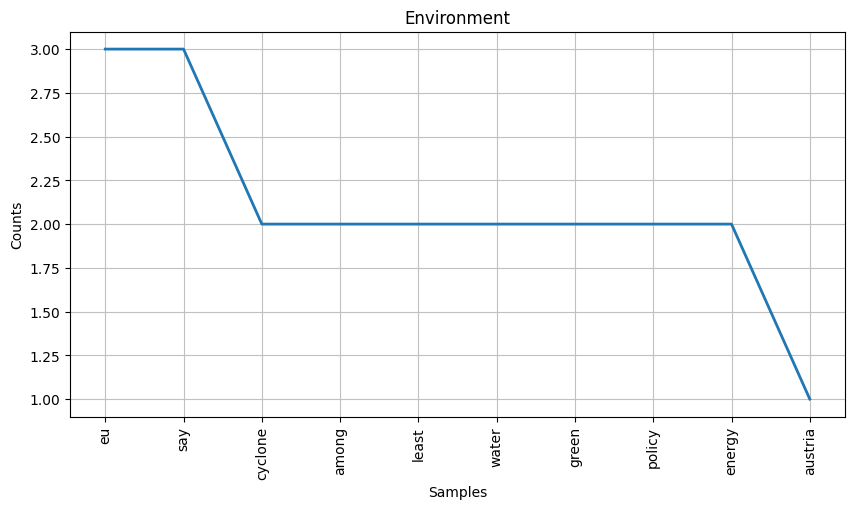

Topic: Europe
[('russia', 6), ('ukraine', 5), ('say', 5), ('deal', 4), ('reform', 3), ('diplomat', 2), ('russian', 2), ('war', 2), ('eu', 2), ('pension', 2)]


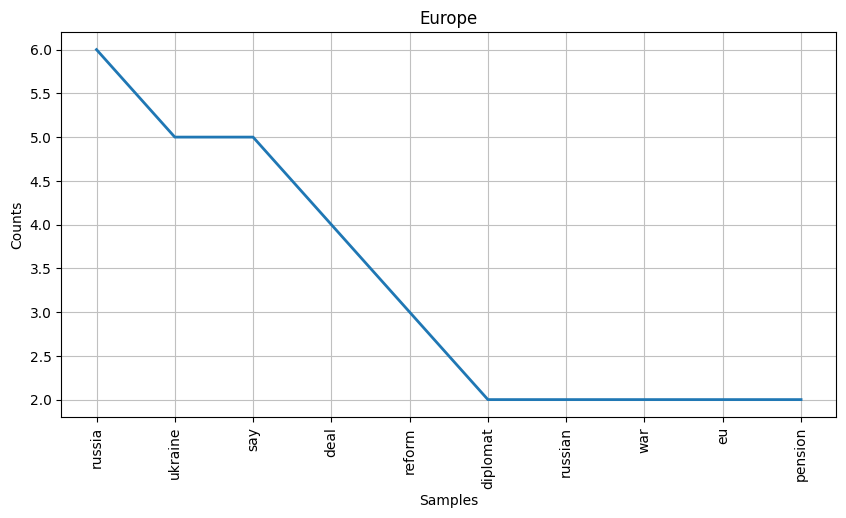

Topic: European Markets
[('ecb', 3), ('rate', 3), ('hike', 2), ('lagarde', 1), ('comment', 1), ('press', 1), ('conference', 1), ('euro', 1), ('bond', 1), ('nudge', 1)]


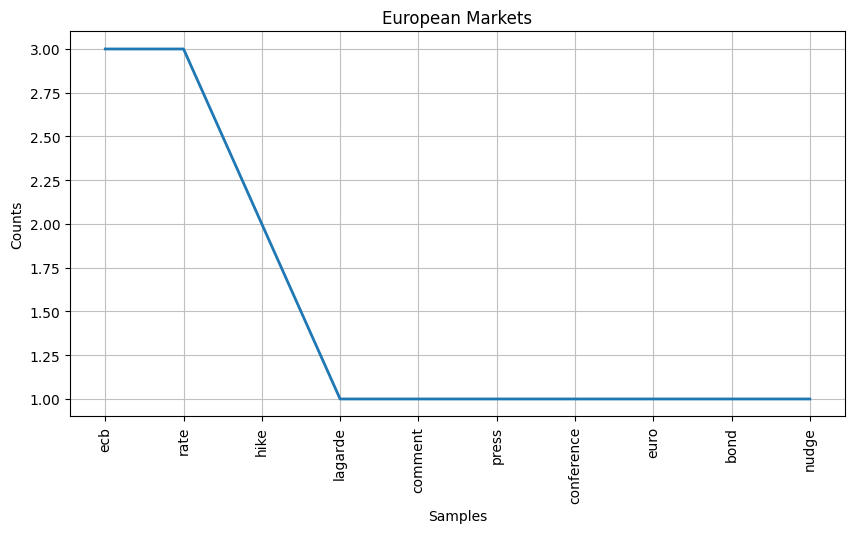

Topic: Exploration & Production
[('oil', 4), ('equinor', 2), ('gas', 2), ('price', 2), ('make', 2), ('say', 1), ('could', 1), ('high', 1), ('next', 1), ('winter', 1)]


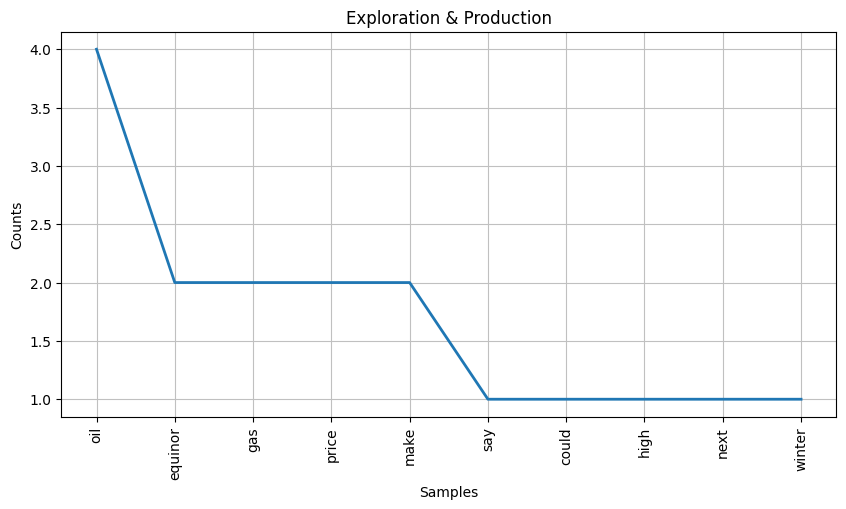

Topic: Finance
[('bank', 12), ('credit', 9), ('suisse', 9), ('u', 7), ('svb', 7), ('collapse', 4), ('banking', 3), ('factbox', 3), ('global', 2), ('say', 2)]


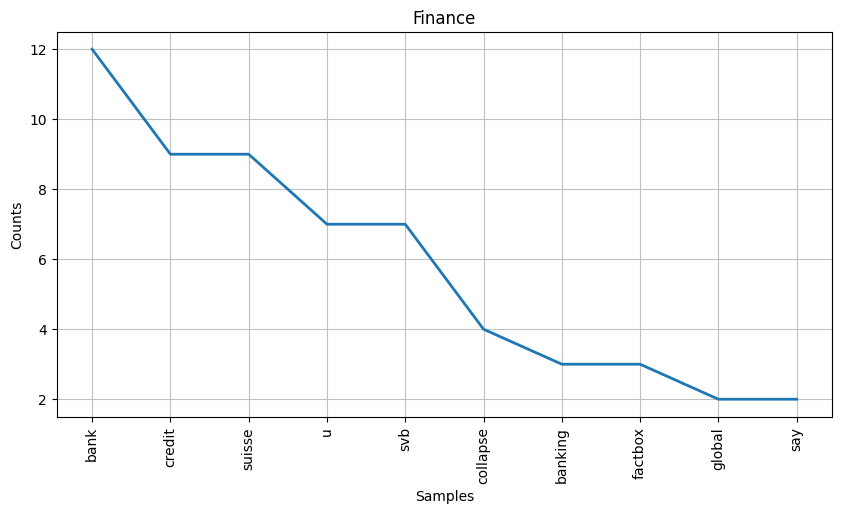

Topic: Financial Results
[('vws', 1), ('skoda', 1), ('final', 1), ('stage', 1), ('deal', 1), ('sell', 1), ('russian', 1), ('asset', 1), ('say', 1), ('ceo', 1)]


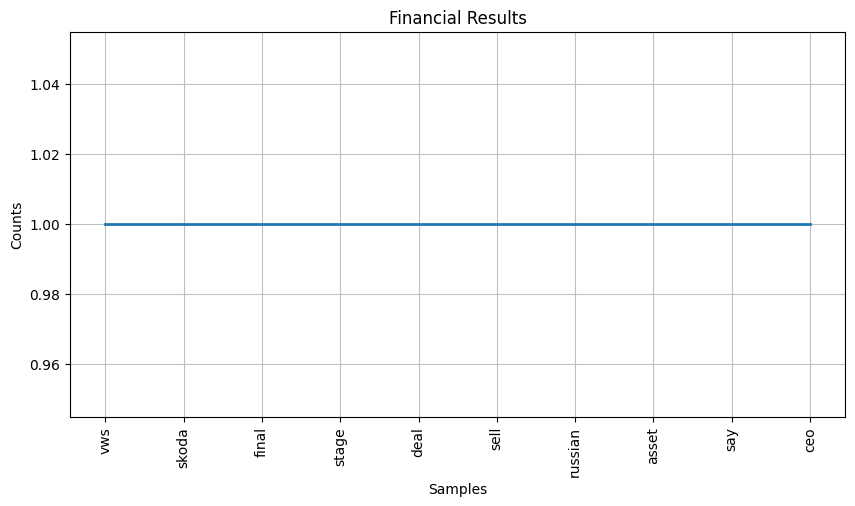

Topic: Fuel
[('decarbonisation', 1), ('centre', 1), ('start', 1), ('5yr', 1), ('partnership', 1), ('container', 1), ('shipper', 1), ('msc', 1)]


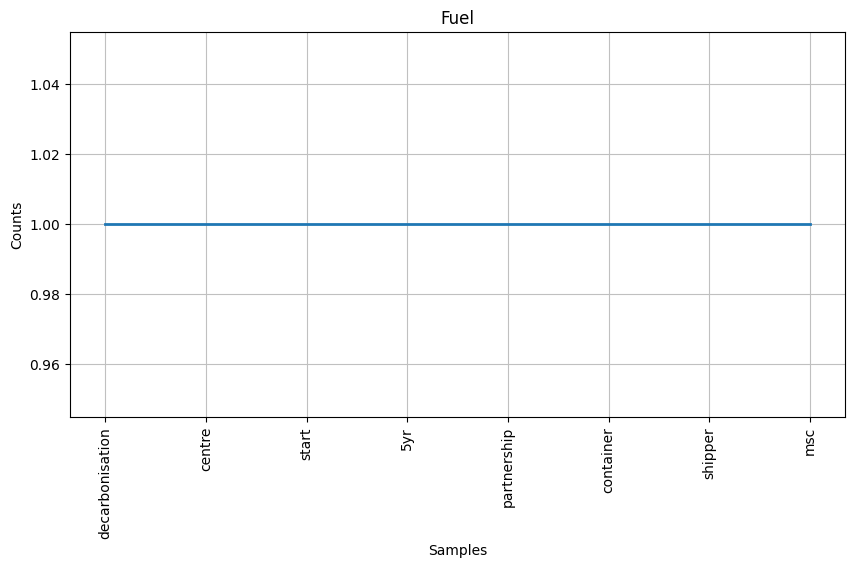

Topic: Fuel Oil
[('siemens', 1), ('energy', 1), ('sell', 1), ('13', 1), ('billion', 1), ('share', 1), ('help', 1), ('fund', 1), ('gamesa', 1), ('bid', 1)]


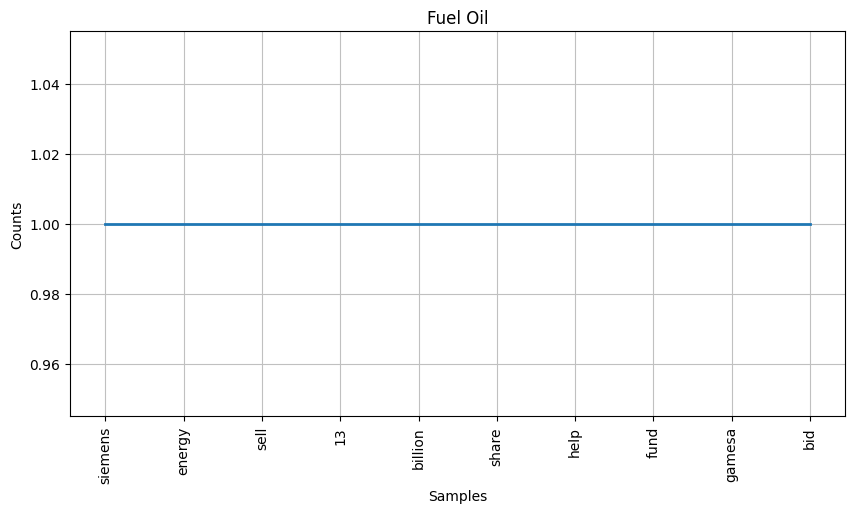

Topic: Future of Health
[('u', 9), ('fda', 6), ('drug', 4), ('vaccine', 4), ('result', 3), ('issue', 2), ('initial', 2), ('price', 2), ('negotiation', 2), ('gsk', 2)]


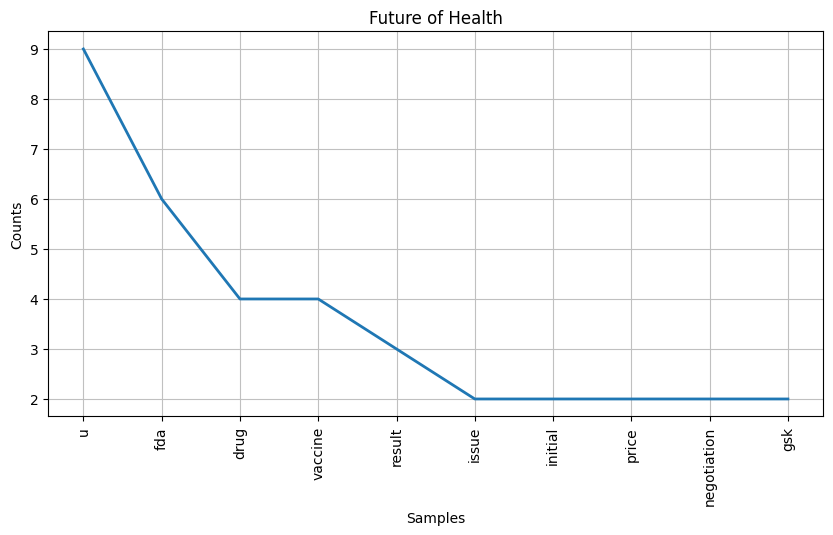

Topic: Future of Money
[('crypto', 9), ('u', 3), ('new', 3), ('say', 3), ('million', 2), ('wind', 2), ('nfts', 2), ('amid', 2), ('banking', 2), ('hit', 2)]


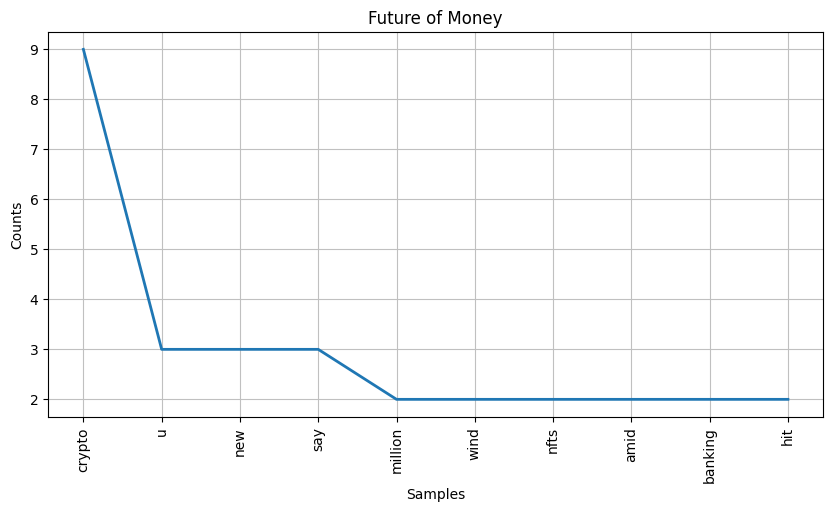

Topic: Governance
[('buying', 1), ('uniper', 1), ('mistake', 1), ('finnish', 1), ('finance', 1), ('minister', 1), ('say', 1)]


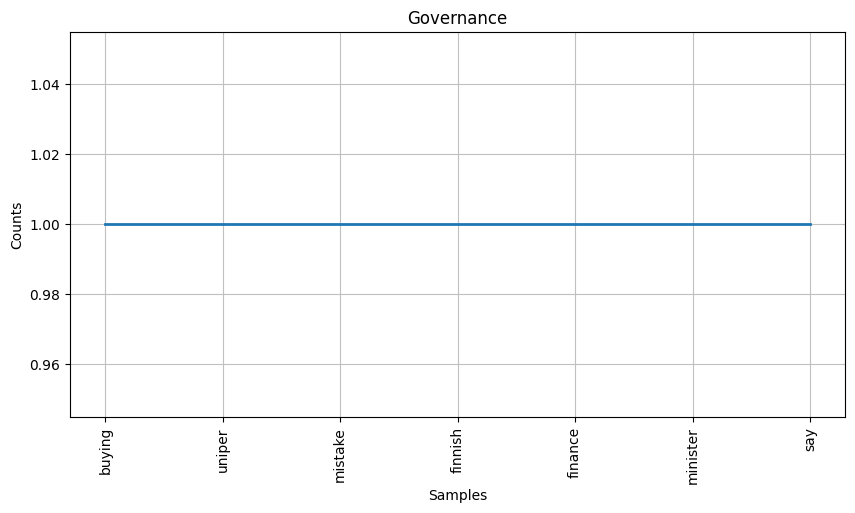

Topic: Government
[('u', 3), ('sue', 2), ('rite', 2), ('aid', 2), ('missing', 2), ('opioid', 2), ('red', 2), ('flag', 2), ('judge', 1), ('mull', 1)]


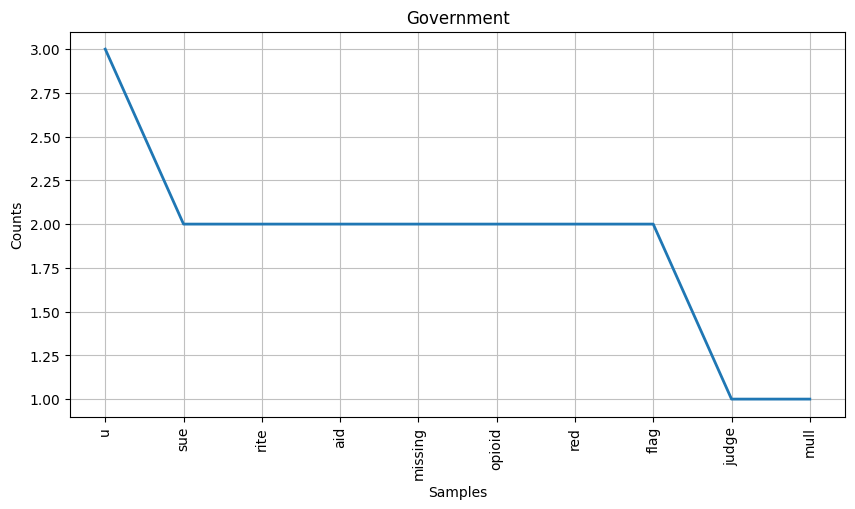

Topic: Grid & Infrastructure
[('italy', 2), ('say', 2), ('snam', 1), ('cut', 1), ('tag', 1), ('stake', 1), ('value', 1), ('meet', 1), ('2023', 1), ('goal', 1)]


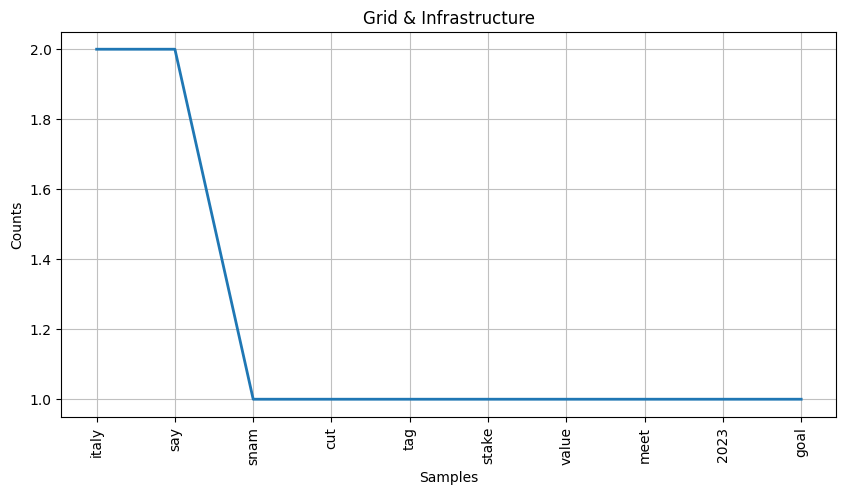

Topic: Healthcare & Pharmaceuticals
[('drug', 5), ('u', 4), ('alzheimers', 2), ('say', 2), ('fda', 2), ('novo', 2), ('eli', 2), ('plan', 2), ('pharma', 2), ('association', 1)]


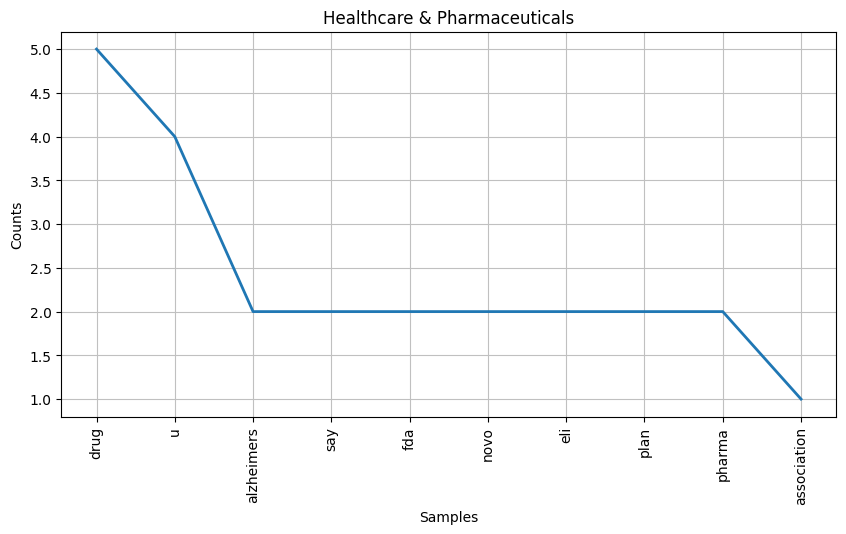

Topic: India
[('india', 10), ('focus', 2), ('rupee', 2), ('share', 2), ('global', 2), ('source', 2), ('govt', 2), ('top', 2), ('court', 2), ('dlf', 1)]


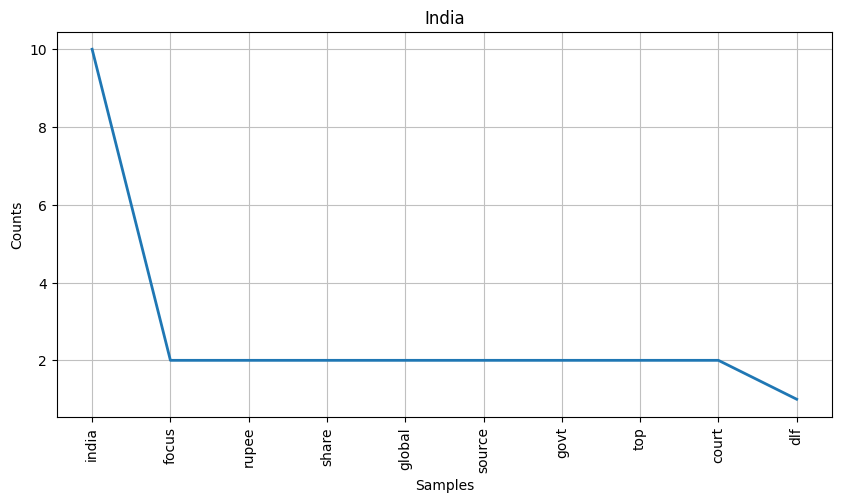

Topic: Investigations
[('dow', 1), ('said', 1), ('recycling', 1), ('shoe', 1), ('found', 1), ('indonesian', 1), ('flea', 1), ('market', 1)]


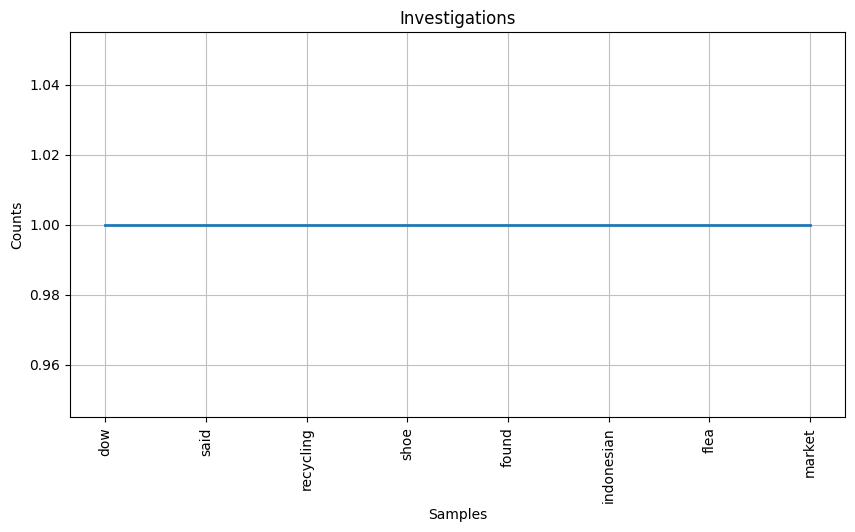

Topic: Legal
[('say', 3), ('court', 3), ('alaska', 3), ('willow', 3), ('project', 3), ('u', 2), ('bln', 2), ('prosecutor', 2), ('tax', 2), ('sue', 2)]


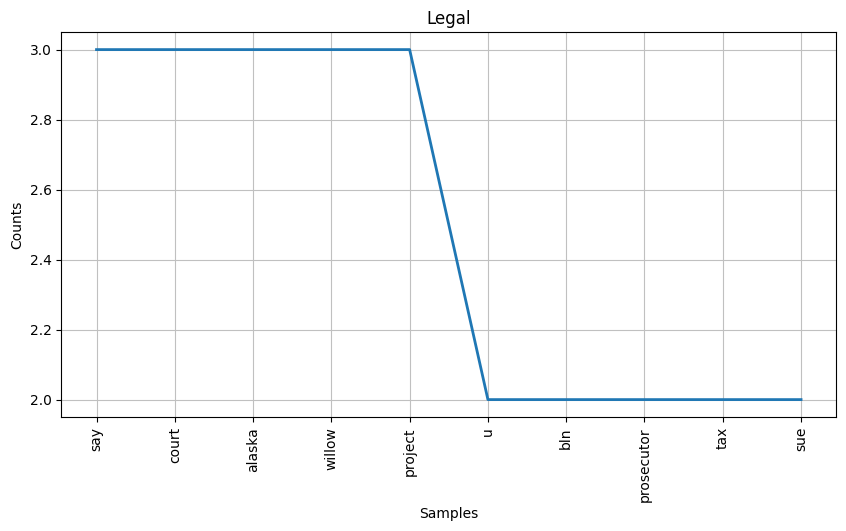

Topic: Lifestyle
[('oscar', 8), ('win', 6), ('best', 3), ('everything', 3), ('everywhere', 3), ('warner', 2), ('new', 2), ('return', 2), ('2023', 2), ('nears', 2)]


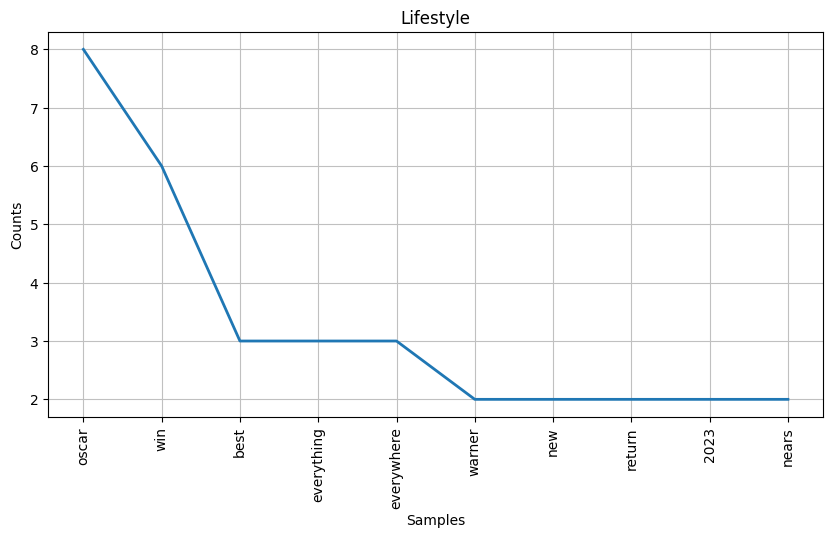

Topic: Litigation
[('new', 1), ('york', 1), ('sue', 1), ('kucoin', 1), ('expands', 1), ('cryptocurrency', 1), ('crackdown', 1)]


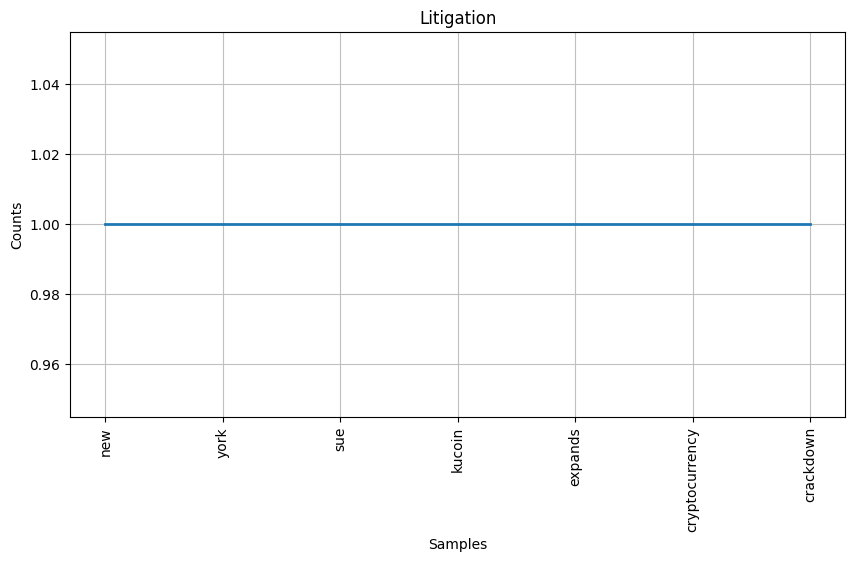

Topic: Macro Matters
[('rate', 9), ('u', 8), ('inflation', 8), ('february', 7), ('bank', 7), ('hike', 6), ('analysis', 6), ('despite', 5), ('india', 5), ('fed', 5)]


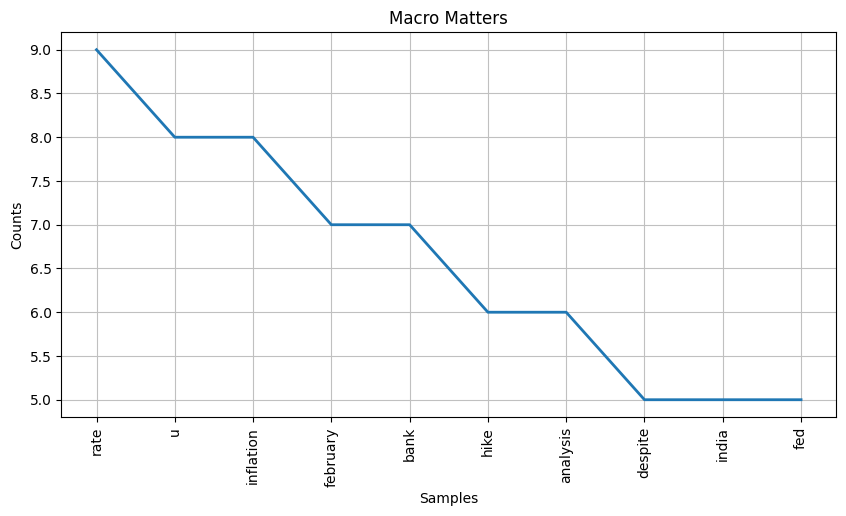

Topic: Markets
[('bank', 14), ('svb', 10), ('u', 9), ('banking', 8), ('rate', 7), ('share', 7), ('market', 6), ('china', 5), ('credit', 5), ('suisse', 5)]


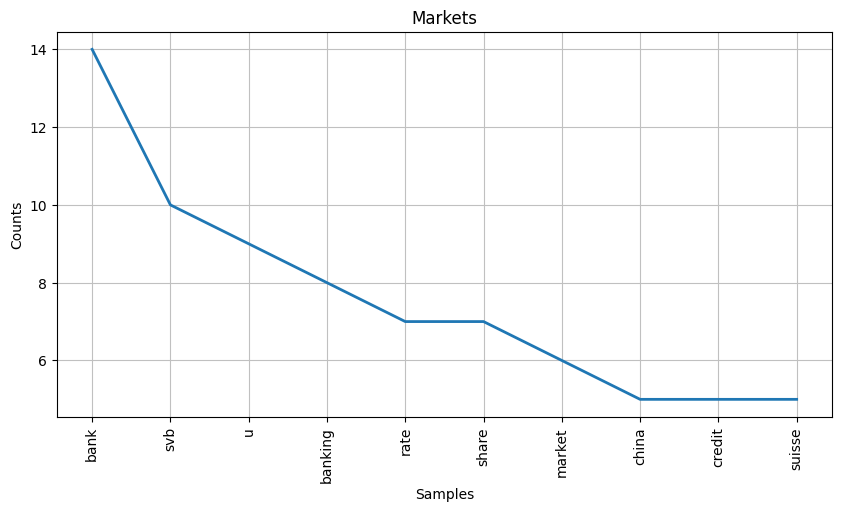

Topic: Media & Telecom
[('biden', 1), ('administration', 1), ('look', 1), ('free', 1), ('wireless', 1), ('spectrum', 1), ('advanced', 1), ('technology', 1), ('tv', 1), ('rating', 1)]


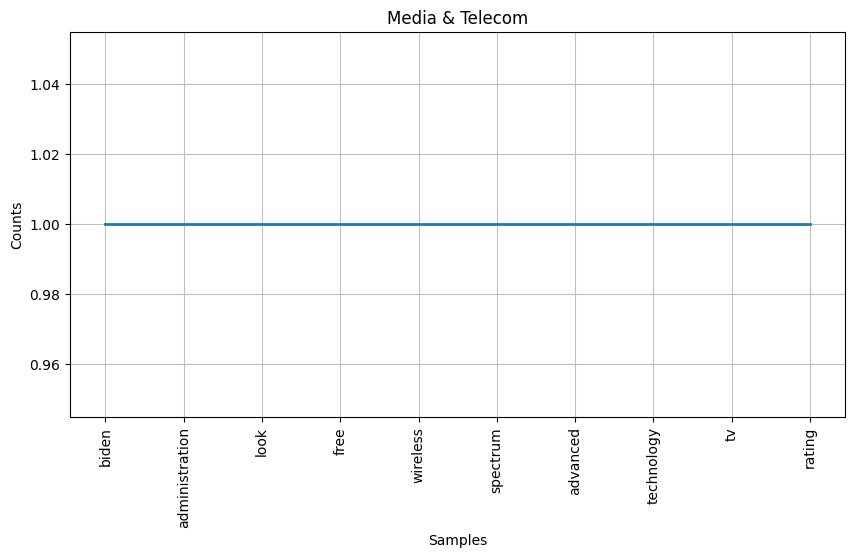

Topic: Middle East
[('turkey', 4), ('syria', 4), ('analysis', 3), ('iran', 3), ('bank', 3), ('quake', 3), ('israel', 3), ('iraq', 2), ('israeli', 2), ('top', 2)]


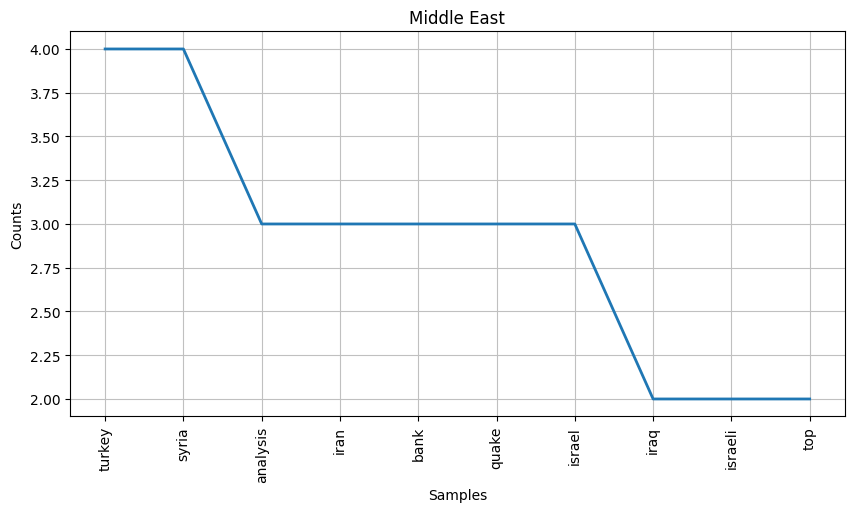

Topic: OPEC
[('opec', 2), ('oil', 2), ('view', 1), ('price', 1), ('drop', 1), ('financially', 1), ('driven', 1), ('delegate', 1), ('say', 1), ('raise', 1)]


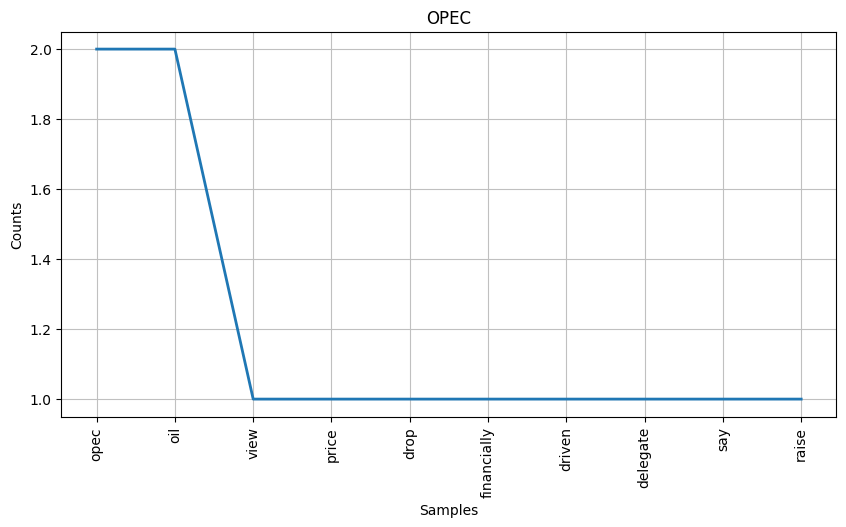

Topic: Partnerships & M&A
[('motor', 2), ('hyundai', 1), ('line', 1), ('buy', 1), ('general', 1), ('india', 1), ('plant', 1)]


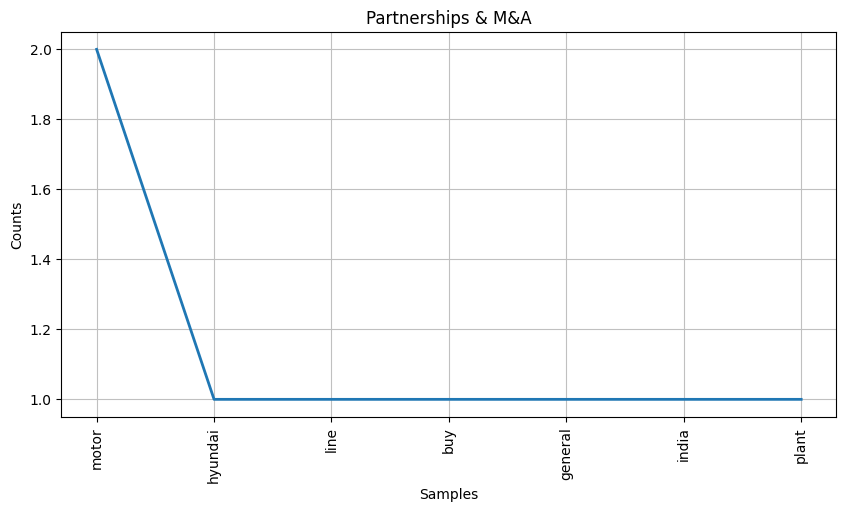

Topic: Rates & Bonds
[('rate', 3), ('fed', 2), ('hike', 2), ('investor', 2), ('seen', 1), ('delivering', 1), ('quarterpoint', 1), ('next', 1), ('week', 1), ('see', 1)]


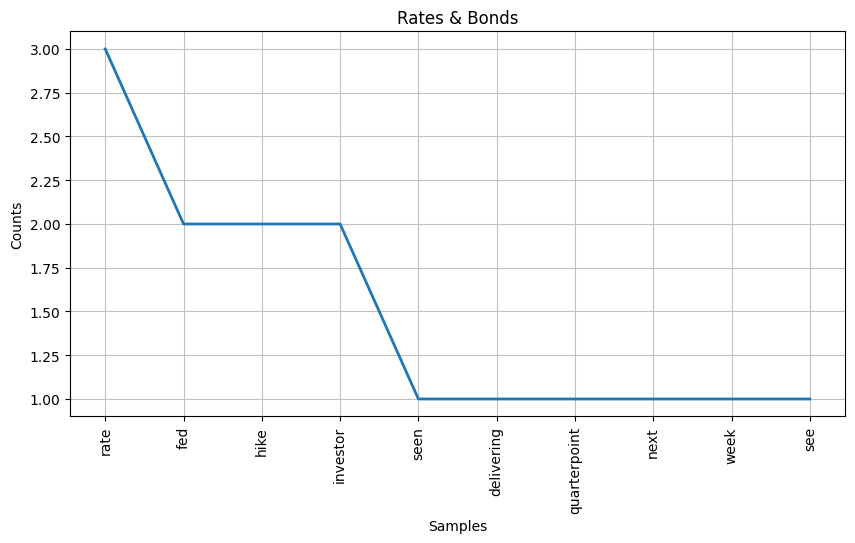

Topic: Regulatory Oversight
[('pfizer', 2), ('fda', 1), ('say', 1), ('covid', 1), ('pill', 1), ('eua', 1), ('adolescent', 1), ('stay', 1), ('even', 1), ('nod', 1)]


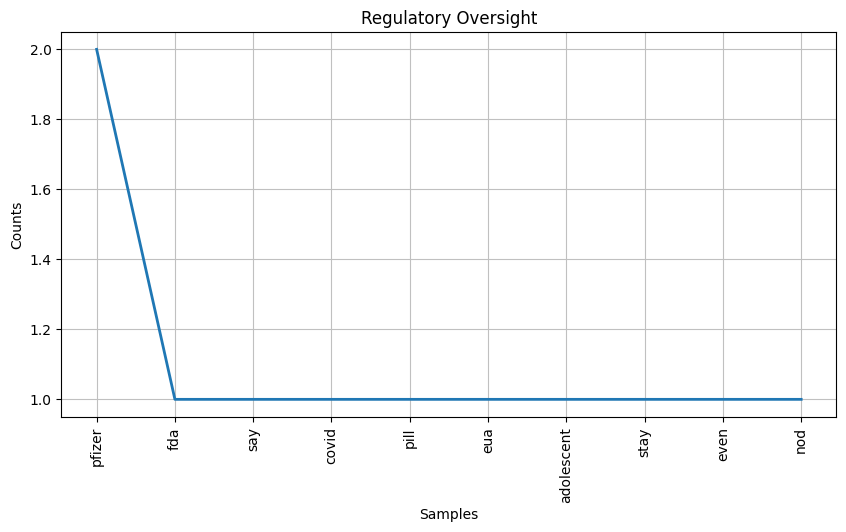

Topic: Renewable Fuels
[('bmw', 1), ('efuels', 1), ('highest', 1), ('impact', 1), ('current', 1), ('fleet', 1), ('new', 1), ('car', 1), ('exclusive', 1), ('hydrogen', 1)]


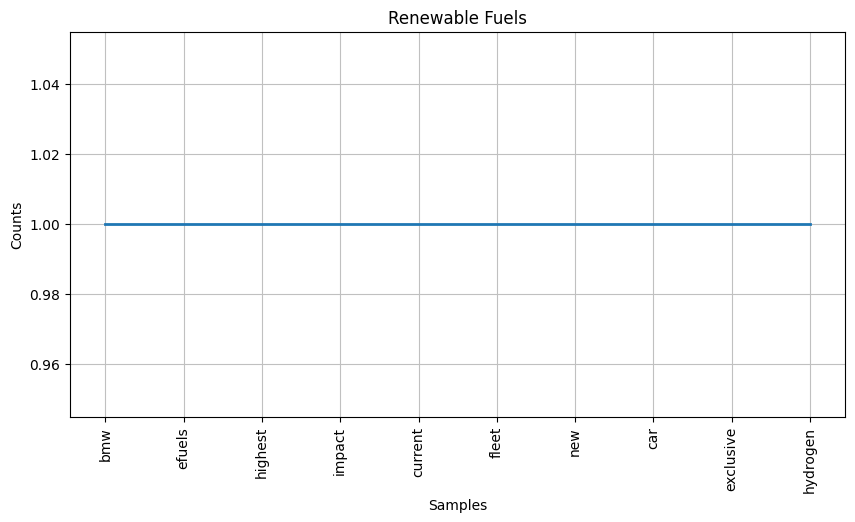

Topic: Retail & Consumer
[('sale', 5), ('new', 4), ('u', 4), ('dollar', 2), ('spending', 2), ('rise', 2), ('appoints', 2), ('hm', 2), ('see', 2), ('general', 1)]


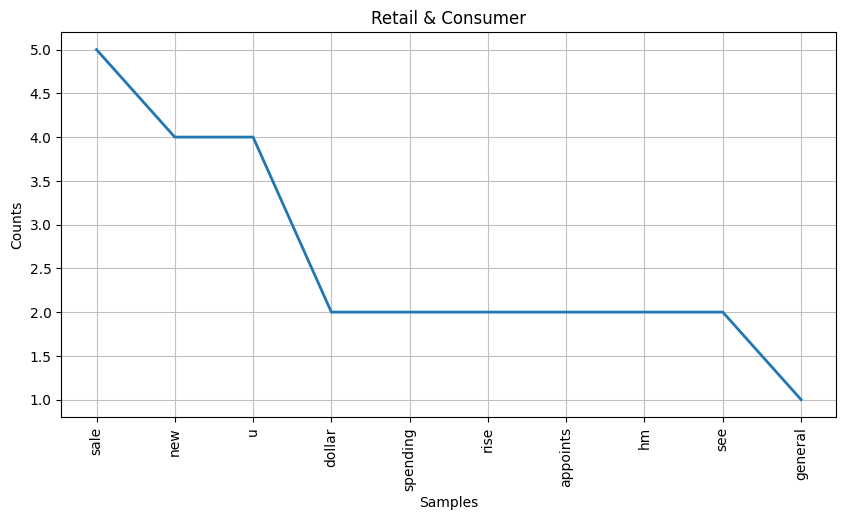

Topic: Science
[('launch', 2), ('amazon', 1), ('target', 1), ('2024', 1), ('first', 1), ('kuiper', 1), ('internet', 1), ('satellite', 1), ('relativity', 1), ('postpones', 1)]


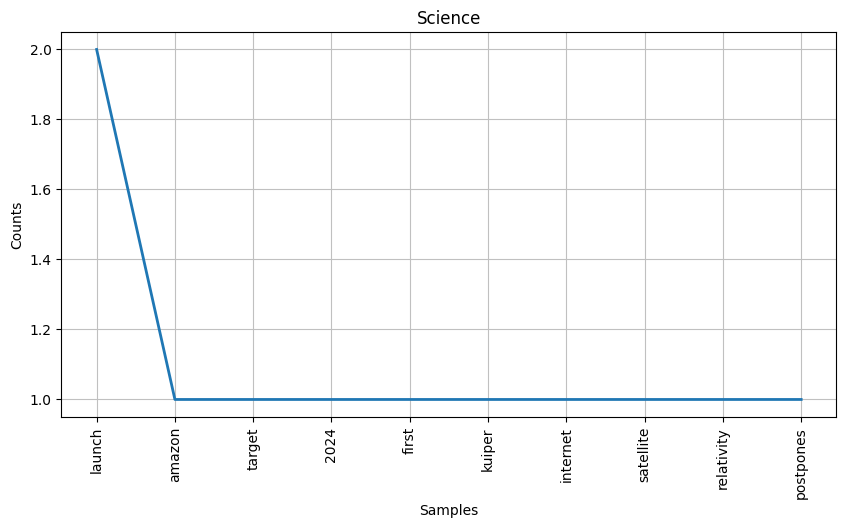

Topic: Shareholder Activism
[('australia', 1), ('biggest', 1), ('pension', 1), ('fund', 1), ('enough', 1), ('climate', 1), ('activist', 1), ('investor', 1), ('say', 1), ('carl', 1)]


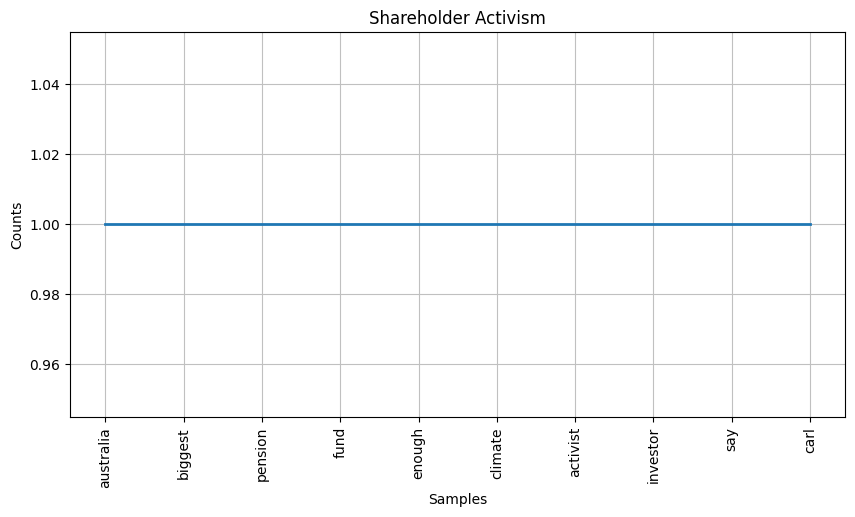

Topic: Sustainable & EV Supply Chain
[('bmw', 1), ('earnings', 1), ('lag', 1), ('estimate', 1), ('name', 1), ('new', 1), ('finance', 1), ('chief', 1)]


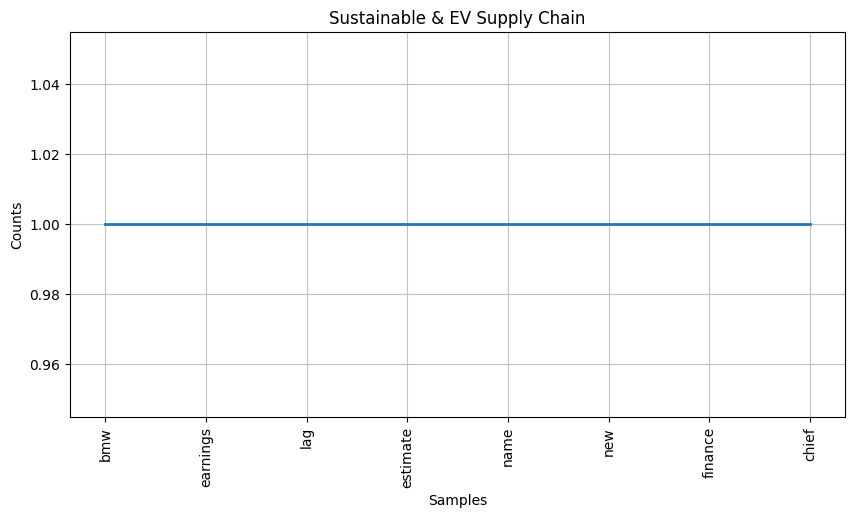

Topic: Sustainable Business
[('ikeas', 1), ('home', 1), ('delivery', 1), ('fully', 1), ('electric', 1), ('2025', 1), ('ceo', 1), ('say', 1), ('customer', 1), ('service', 1)]


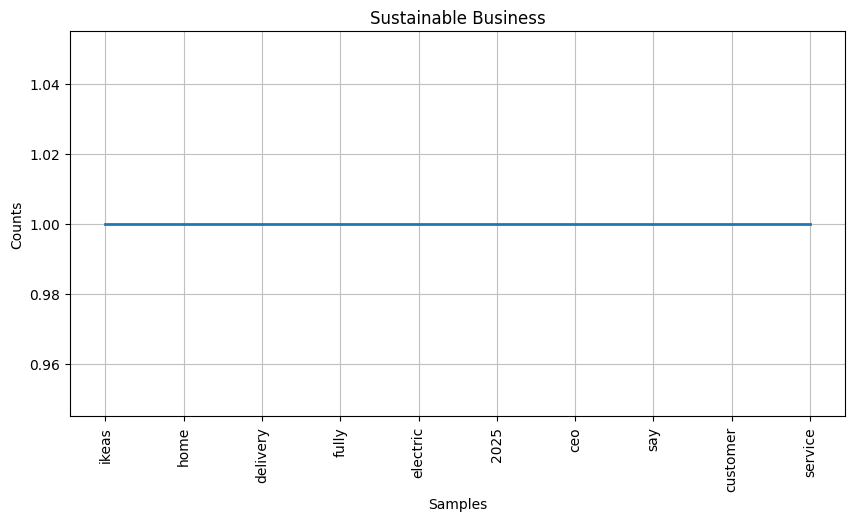

Topic: Sustainable Markets
[('hydrogen', 3), ('eu', 2), ('plan', 2), ('draft', 2), ('subsidy', 1), ('made', 1), ('using', 1), ('renewable', 1), ('energy', 1), ('document', 1)]


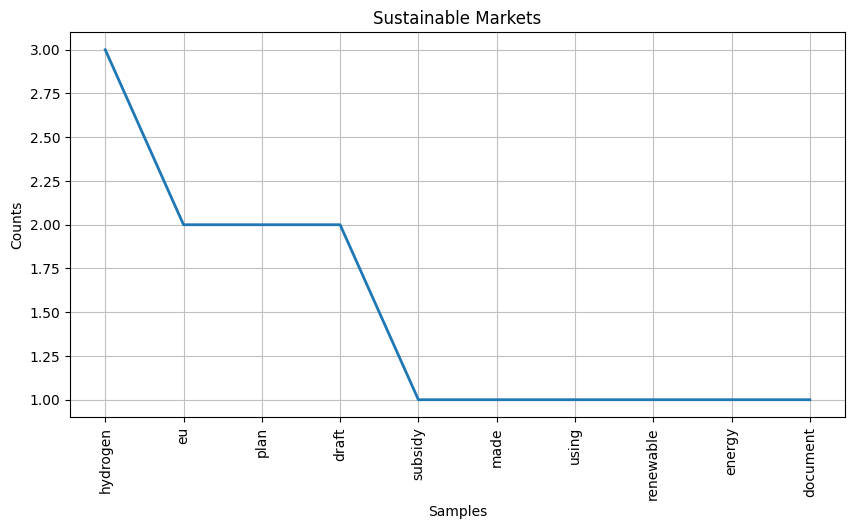

Topic: Take Five
[('take', 13), ('five', 13), ('tokyo', 2), ('central', 2), ('staring', 1), ('ceiling', 1), ('much', 1), ('say', 1), ('davos', 1), ('welcome', 1)]


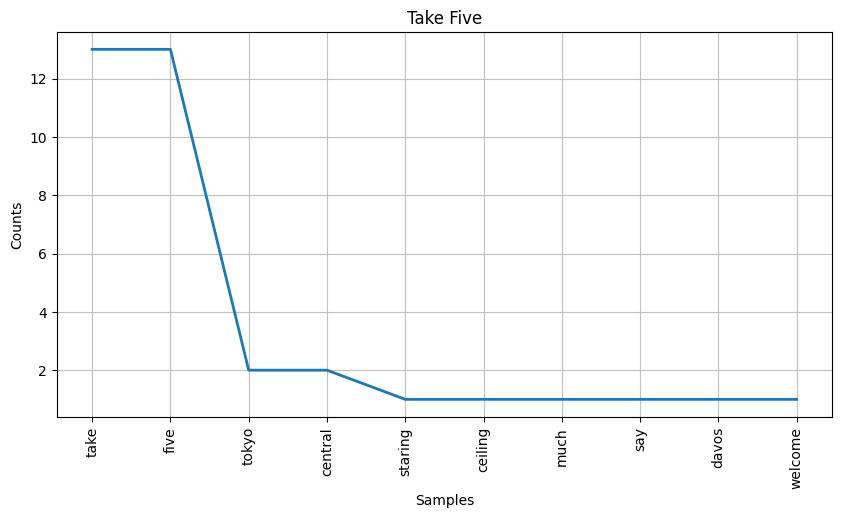

Topic: Technology
[('u', 4), ('exclusive', 4), ('say', 4), ('new', 3), ('stock', 3), ('firm', 3), ('plan', 3), ('news', 3), ('chinese', 2), ('security', 2)]


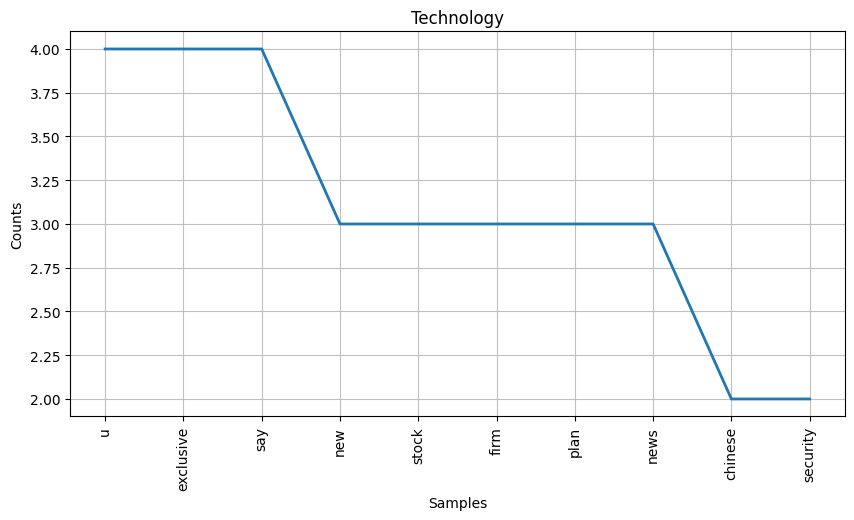

Topic: U.S. Markets
[('bank', 5), ('wall', 4), ('street', 4), ('u', 3), ('drag', 2), ('market', 2), ('new', 2), ('open', 1), ('lower', 1), ('ecb', 1)]


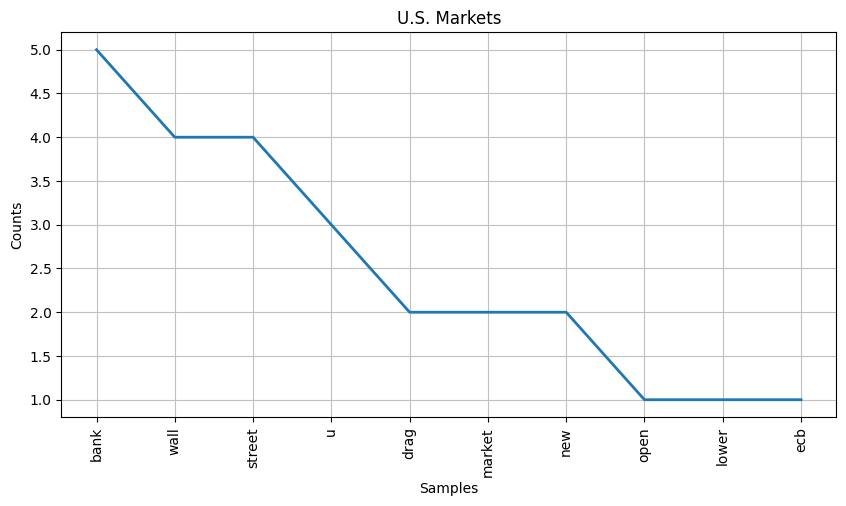

Topic: United Kingdom
[('uk', 17), ('pay', 5), ('say', 5), ('deal', 4), ('hunt', 4), ('budget', 4), ('tiktok', 3), ('government', 3), ('new', 3), ('brexit', 3)]


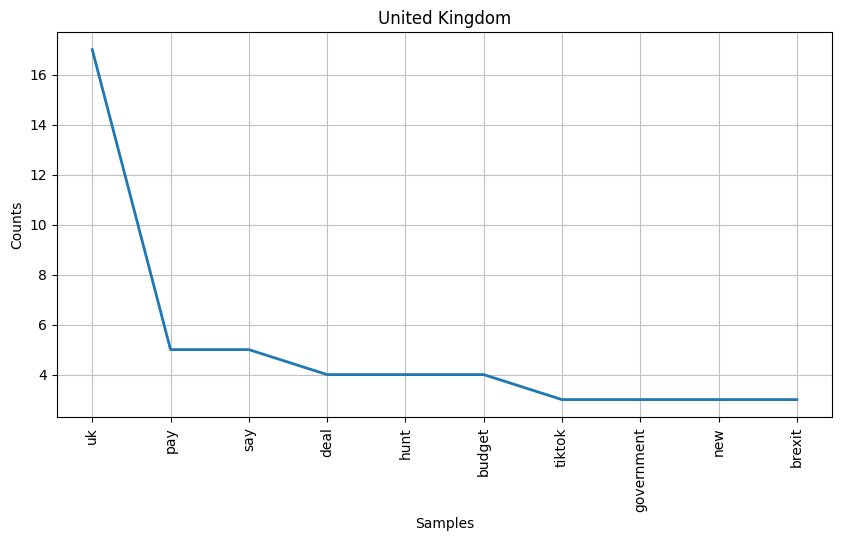

Topic: United States
[('u', 10), ('jury', 3), ('abortion', 3), ('bank', 3), ('grand', 2), ('trump', 2), ('state', 2), ('pill', 2), ('say', 2), ('senator', 2)]


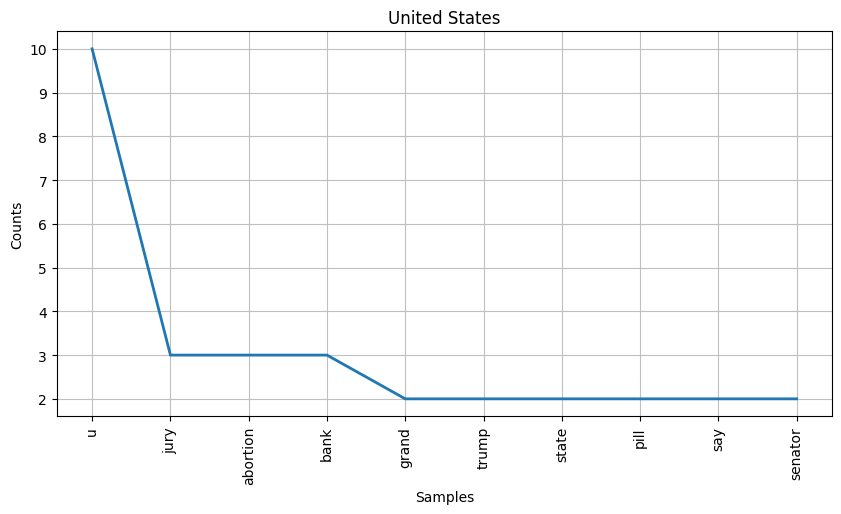

Topic: Water Management
[('philippine', 1), ('firm', 1), ('planning', 1), ('ipo', 1), ('target', 1), ('new', 1), ('gas', 1), ('well', 1), ('solar', 1), ('investment', 1)]


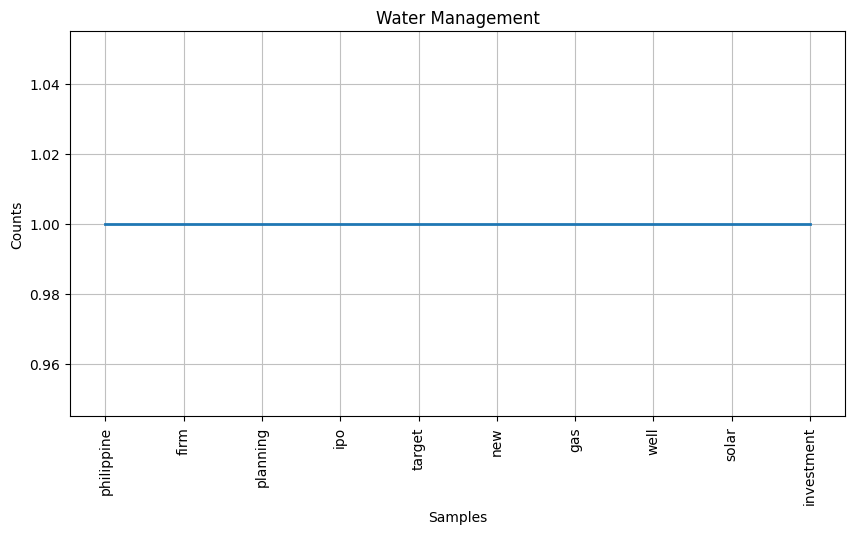

Topic: Wind
[('ceraweekrenewable', 1), ('energy', 1), ('investor', 1), ('squeezed', 1), ('higher', 1), ('interest', 1), ('rate', 1), ('cost', 1)]


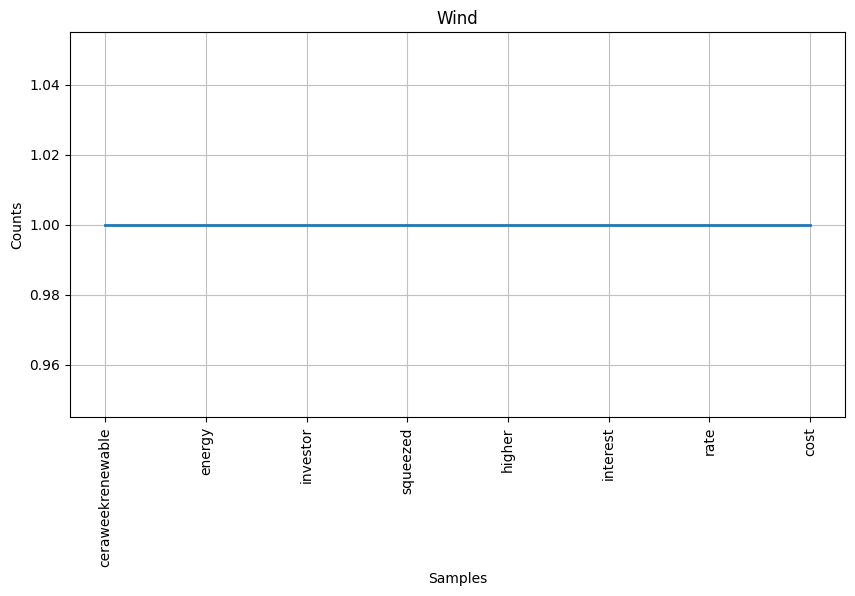

Topic: World
[('u', 14), ('ukraine', 12), ('russia', 11), ('say', 11), ('uk', 11), ('china', 8), ('drone', 8), ('deal', 6), ('bank', 6), ('war', 5)]


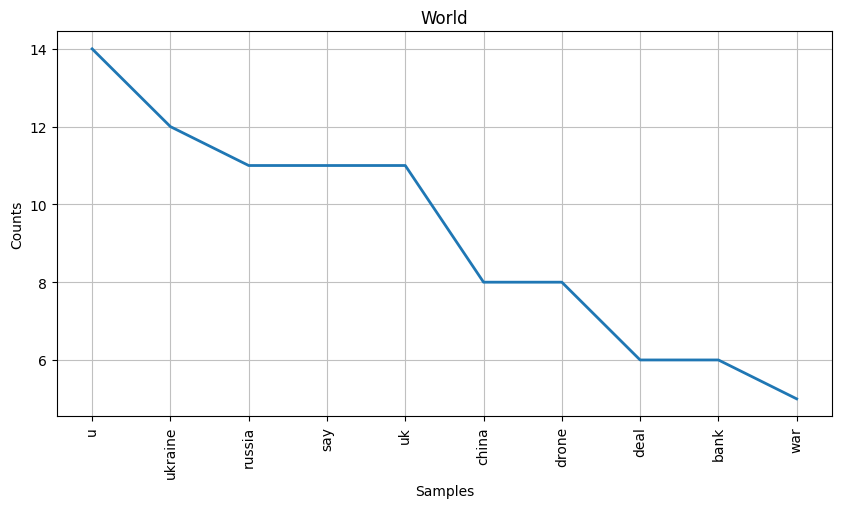

Topic: World at Work
[('uk', 5), ('job', 5), ('cut', 4), ('union', 4), ('pay', 3), ('vote', 2), ('3', 2), ('strike', 2), ('worker', 2), ('japan', 2)]


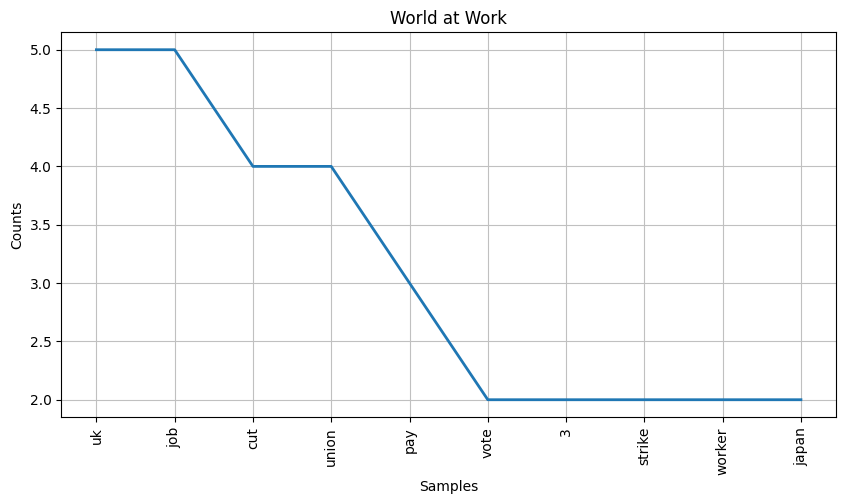

Topic: americas
[('canada', 1), ('asylum', 1), ('seeker', 1), ('using', 1), ('unofficial', 1), ('u', 1), ('border', 1), ('crossing', 1)]


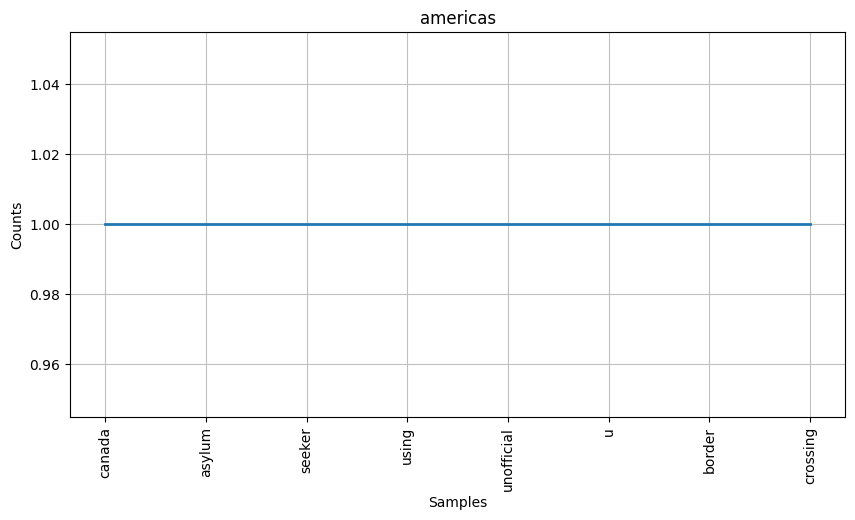

Topic: asia-pacific
[('japan', 1), ('battle', 1), ('persuade', 1), ('big', 1), ('brand', 1), ('join', 1), ('military', 1), ('buildout', 1)]


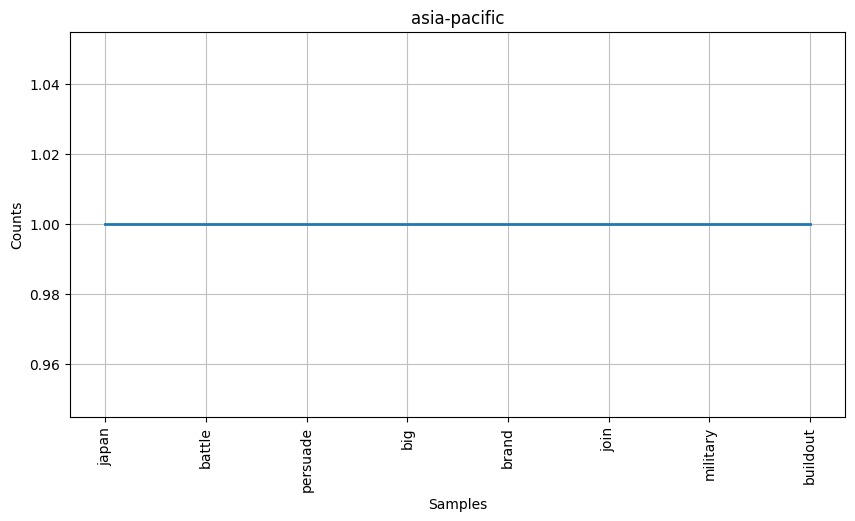

Topic: europe
[('ukraine', 2), ('explainer', 1), ('china', 1), ('broker', 1), ('peace', 1), ('russia', 1), ('north', 1), ('bakhmut', 1), ('another', 1), ('key', 1)]


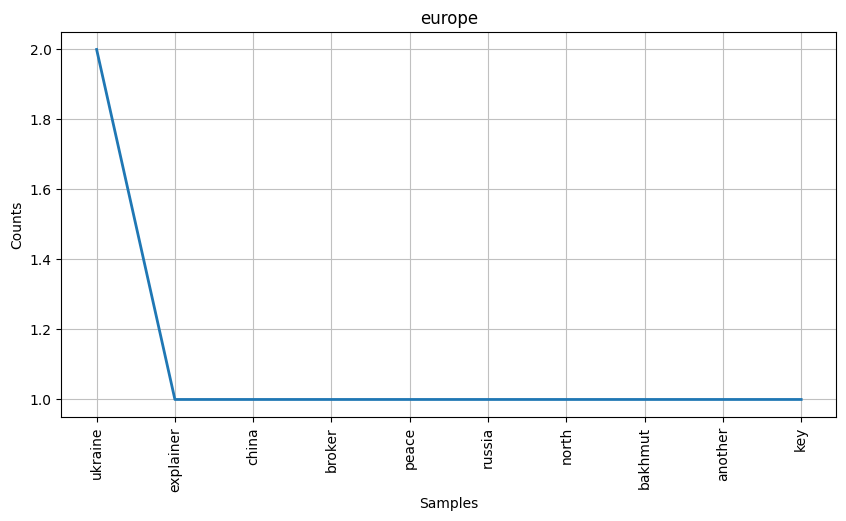

Topic: finance
[('credit', 2), ('suisse', 2), ('explainer', 1), ('get', 1), ('crisis', 1), ('point', 1), ('precipice', 1), ('day', 1), ('drama', 1), ('unfolded', 1)]


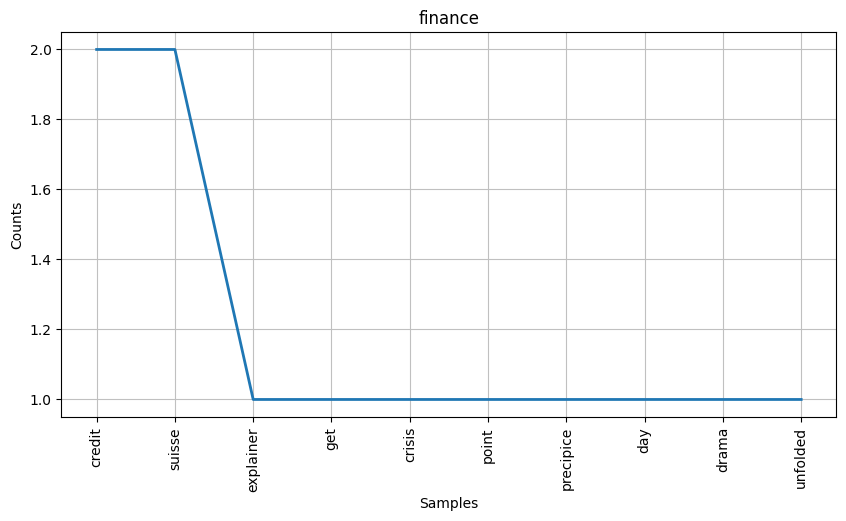

Topic: middle-east
[('new', 1), ('intifada', 1), ('young', 1), ('palestinian', 1), ('fighter', 1), ('rise', 1), ('west', 1), ('bank', 1), ('boil', 1)]


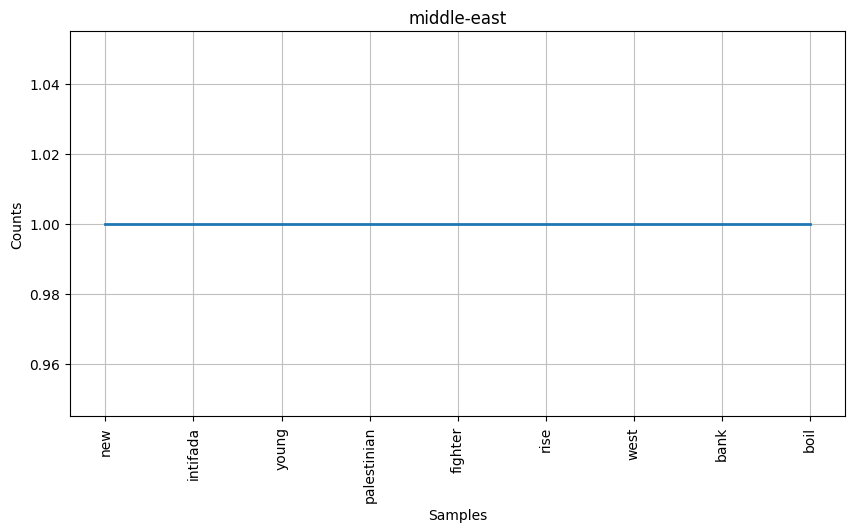

Topic: retail-consumer
[('food', 1), ('maker', 1), ('feeling', 1), ('squeezed', 1), ('pull', 1), ('plug', 1), ('slowselling', 1), ('product', 1)]


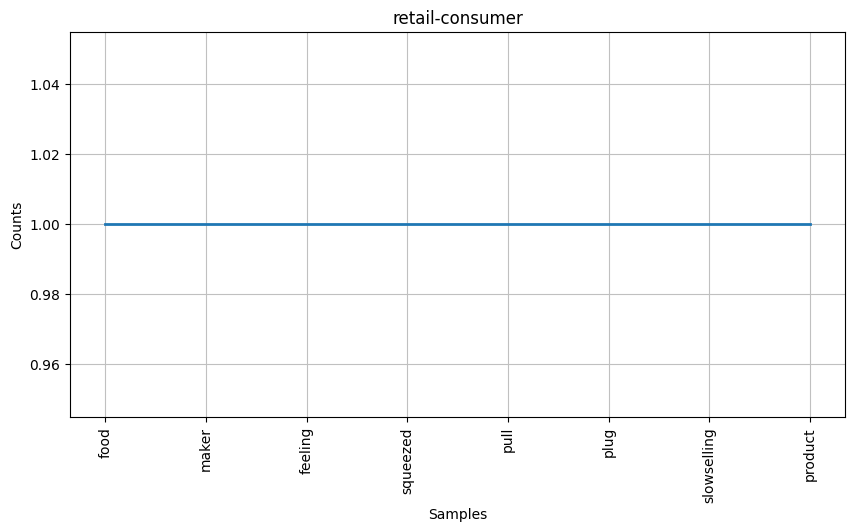

Topic: studio-a24-captures-oscar-spotlight-with-big-wins-best-picture-acting-2023-03-13
[('studio', 1), ('a24', 1), ('capture', 1), ('oscar', 1), ('spotlight', 1), ('big', 1), ('win', 1), ('best', 1), ('picture', 1), ('acting', 1)]


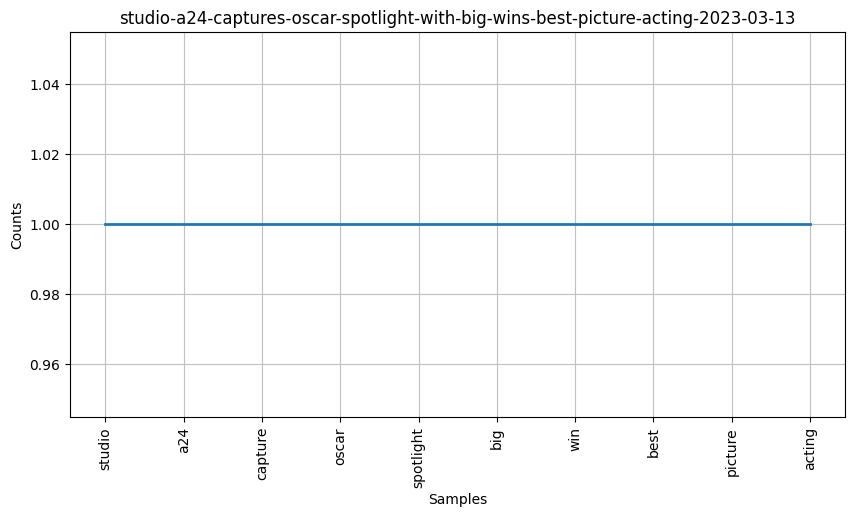

Topic: sustainable-business
[('greenwashing', 1), ('crackdown', 1), ('europe', 1), ('leaf', 1), ('investor', 1), ('dark', 1)]


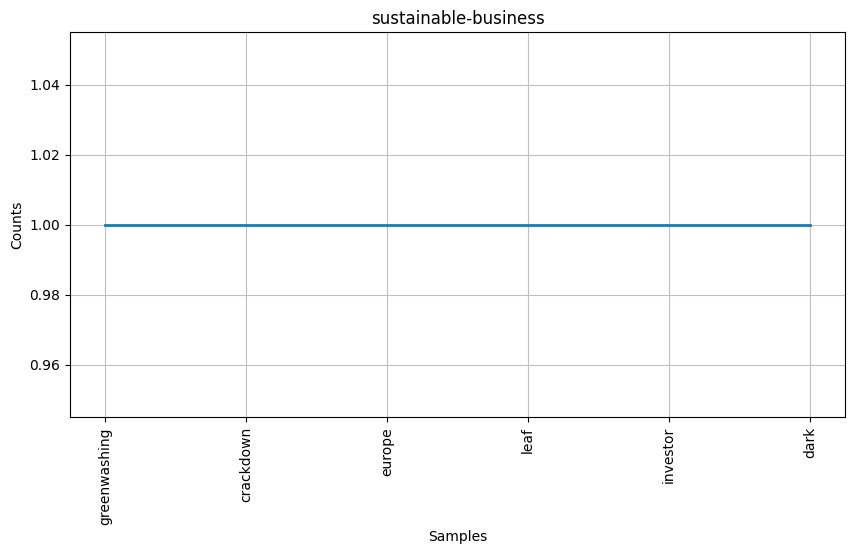

Topic: uk
[('britain', 2), ('tax', 1), ('take', 1), ('risk', 1), ('blowing', 1), ('green', 1), ('energy', 1), ('target', 1), ('health', 1), ('system', 1)]


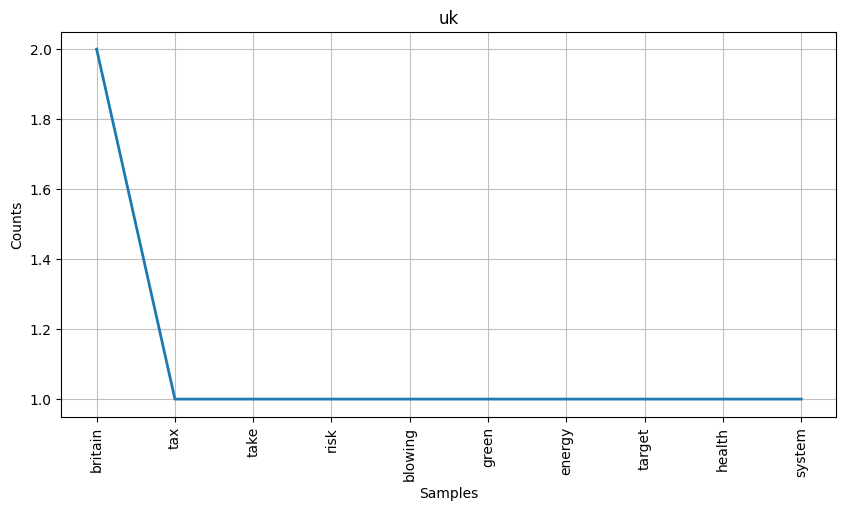

Topic: xiaomis-slow-shift-india-premium-smartphones-helps-samsung-steal-its-crown-2023-03-16
[('xiaomis', 1), ('slow', 1), ('shift', 1), ('india', 1), ('premium', 1), ('smartphones', 1), ('help', 1), ('samsung', 1), ('steal', 1), ('crown', 1)]


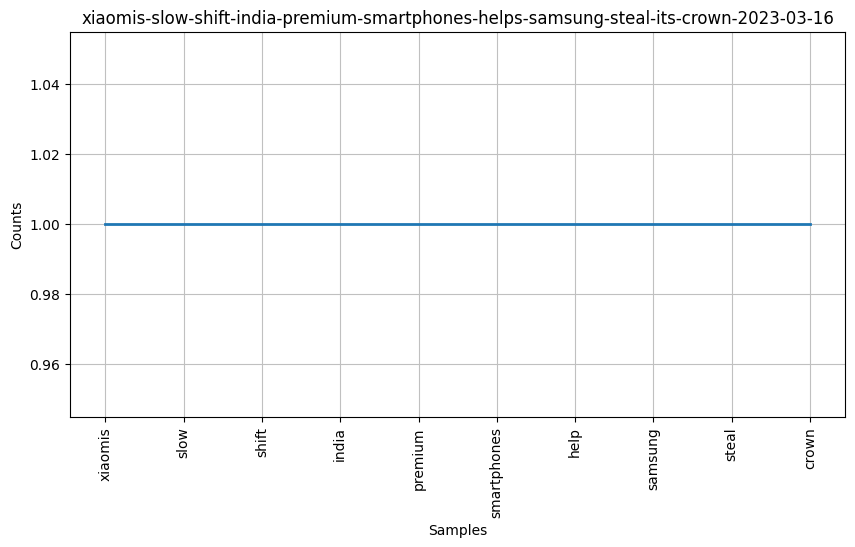

In [87]:
# Group the dataframe by 'Topics'
grouped_df = df.groupby('Topics')

# Loop through each group and get the word frequency distribution
for i,(topic, group) in enumerate(grouped_df):
    # Concatenate all the article titles in the group into a single string
    titles_str = ' '.join(group['Title'].tolist())
    
    # Preprocess the string of titles
    preprocessed_titles_str = preprocess_text(titles_str)
    
    # Tokenize the preprocessed string of titles
    tokens = word_tokenize(preprocessed_titles_str)
    
    # Create a frequency distribution of the tokens
    freq_dist = FreqDist(tokens)
    
    # Print the top 10 most common words for this topic
    print('Topic:', topic)
    print(freq_dist.most_common(10))
    plt.figure(figsize=(10, 5))
    freq_dist.plot(10, title=topic)
    